# Desarrollo de una aplicación de Procesamiento del Lenguaje Natural

## Instalamos gensim y reiniciamos el entorno.

In [ ]:
#Instalación de gensim.
!pip3 install -U gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 717.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 r

## Importación de librerías necesarias

In [ ]:
# Instalamos las librerías necesarias y descargamos los recursos
!pip3 install -U matplotlib
!pip3 install -U seaborn
!pip3 install -U scikit-learn
!pip install praw
!pip install symspellpy
!sudo apt-get install libhunspell-dev
!pip install hunspell
!pip install emoji
!pip3 install fasttext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 119.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 15.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dictionaries-common hunspell-en-us libhunspell-1.7-0 libtext-iconv-perl
Suggested packages:
  ispell | aspell | hunspell wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core
The following NEW packages will be installed:
  dictionaries-common hunspell-en-us libhunspell-1.7-0 libhunspell-dev
  libtext-iconv-perl
0 upgraded, 5 newly installed, 0 to

In [ ]:
import praw
from praw import Reddit
import pandas as pd
import datetime as dt

## ACCESO A LOS SUBREDDITS

In [ ]:
PERSONAL_USE_SCRIPT_14_CHARS = '...'
SECRET_KEY_27_CHARS = '...'
YOUR_APP_NAME = '...'
YOUR_REDDIT_USER_NAME = '...'
YOUR_REDDIT_LOGIN_PASSWORD = '...'

In [ ]:
#Creación del objeto Reddit

reddit = praw.Reddit(client_id= PERSONAL_USE_SCRIPT_14_CHARS,
                     client_secret= SECRET_KEY_27_CHARS,
                     user_agent= YOUR_REDDIT_USER_NAME)
                    #  username='YOUR_REDDIT_USER_NAME'',
                    #  password='YOUR_REDDIT_LOGIN_PASSWORD')

In [ ]:
print(reddit)

A la hora de ordenar los comentarios tenemos las siguientes opciones:

Orden	Significado

"best"	Los mejor valorados (por defecto)

"top"	Más votos positivos

"new"	Comentarios más recientes

"controversial"	Votos divididos (muchos up y down)

"old"	Comentarios más antiguos primero

"qa"	Relevancia tipo pregunta-respuesta

## EJERCICIO 1:  Compilación del corpus y uso de procesamiento léxico

EXPLICACIÓN DE LO QUE HEMOS HECHO EN DETALLE
-EXPLICAR LA ELECCIÓN DE LOS SUBREDITS
-EXPLICAR COMO FUNCIONA CADA FUNCIÓN
-EXPLICAR LA ELECCIÓN DE LOS DICCIONARIOS DE CORRECCIÓN ORTOGRÁFICA Y NOEMALIZACIÓN DE LAS FECHAS





In [ ]:
# Descargamos un fichero python con la implementación del BM25
!wget -c --no-check-certificate https:/.../BM25.py
!wget --no-check-certificate https://github.com/LibreOffice/dictionaries/raw/refs/heads/master/en/en_US.aff #https://raw.githubusercontent.com/LibreOffice/dictionaries/master/en/en_US.aff
!wget --no-check-certificate https://github.com/LibreOffice/dictionaries/raw/refs/heads/master/en/en_US.dic #https://raw.githubusercontent.com/LibreOffice/dictionaries/master/en/en_US.dic

La elección de los subreddits se ha realizado de forma que haya dos subreddits representativos de cada ámbito temático. En la categoría de deportes, hemos seleccionado `r/nba` y `r/nfl`, correspondientes a las principales ligas profesionales de baloncesto y fútbol americano en Estados Unidos, ambas con una gran base de aficionados, por lo que los comentarios que seleccionemos será bastante variados. En el ámbito de la cocina y la nutrición, hemos elegido `r/nutrition` y `r/Cooking`, que son comunidades muy activas y con suficiente variabilidad temática. Por último, para representar el área técnico-científica, hemos seleccionado `r/technology` y `r/askscience`, dos subreddits centrados en la divulgación tecnológica y científica, respectivamente.

In [ ]:
import praw
import json
import os
import re
import hunspell
import emoji
import time
from prawcore.exceptions import ServerError

#Otros "askscience"
subreddits = ["nba", "nfl", "Cooking", "nutrition", "technology", "askscience"]


output_folder = "subreddit_data"
os.makedirs(output_folder, exist_ok=True)

NUM_THREADS = 20
NUM_COMMENTS = 50

def correccion_ortografica(texto):    #con la librería sympspell o hunspell, hacer una corrección ortográfica
  dic_path = './en_US.dic'            #Usamos el mismo diccionario que emplea libreoffice para el idioma inglés de US
  aff_path = './en_US.aff'
  dic = hunspell.HunSpell(dic_path, aff_path)
  for palabra in texto.split():
    if not dic.spell(palabra):              #Con .spell() compruebo si la palabra está biem escrita, de forma que si no lo está la corrijo
      sugerencias = dic.suggest(palabra)
      if sugerencias:
        palabra_corregida = sugerencias[0]
        texto = texto.replace(palabra, palabra_corregida)
  return texto



def remove_urls_and_emails(text):
    url_pattern = r'https?://\S+|www\.\S+'
    email_pattern = r'[\w\.-]+@[\w\.-]+\.\w+'

    # Eliminamos URLs y luego emails
    text = re.sub(url_pattern, '', text, flags=re.IGNORECASE)
    text = re.sub(email_pattern, '', text, flags=re.IGNORECASE)

    return text



def eliminar_emojis(text):
  return ''.join(char for char in text if char not in emoji.EMOJI_DATA)


def process_comment(text):
  text = re.sub(r'\?+', '?', text)
  text = re.sub(r'!+', '!', text)
  text = re.sub(r'\n+', ' ', text)
  text = re.sub(r'[\t ]+', ' ', text)
  text = re.sub(r'\\+', '', text)
  text = re.sub(r'\*\*', '', text)  #Eliminar caracteres de negrita
  text = re.sub(r'^\W+','', text) #caracteres no alfanuméricos
  text = remove_urls_and_emails(text)
  text = re.sub(r'\s+', ' ', text)
  text = text.strip()
  # text = correccion_ortografica(text)
  # text = text.lower()
  # text = normalizar_fechas(text)
  # text = eliminar_emojis(text)

  return text

def check_comments(comment): #solo trabajamos con el cuerpo del comentario. Los demás campos realmente no me son relevantes
  MIN_LENGTH = 20   #30 #Como mínimo los comentarios que añadamos deben tener 20 palabras, no queremos que sean excesivamente cortos

  email_pattern = r'[\w\.-]+@[\w\.-]+\.\w+'
  http_pattern = r'https?://\S+|www\.\S+'
  #Nos deshacemos de los emails y páginas web que pudiera haber. Y después comprobamos el comentario para ver si prescidiendo del link y del email,
  #sigue siendo lo suficientemente largo
  comment = re.sub(http_pattern, '', comment)
  comment = re.sub(email_pattern, '', comment)
  comment = re.sub(r'\n+', '\n', re.sub(r'[\t ]+', ' ', comment))


  if not comment or len(comment.split()) < MIN_LENGTH:
    return False

  return True

def get_date(utc_time):
  return dt.datetime.fromtimestamp(utc_time)




En la celda anterior definimos una serie de funciones con el propósito de ser aplicadas al cuerpo de los comentarios con tal de procesar el texto.
Construimos una función de corrección ortográfica (`correccion_ortografica`) que se basa en la librería hunspell para obtener un diccionario en inglés, y por cada palabra que comprobamos que no está bien escrita (con la función .spell()) obtenemos su corrección por medio de dicho diccionario. Esa función la usaremos más adelante en el ejercicio 2 adicional.

También definimos `eliminar_emojis` una función que elimina los emoticonos del cuerpo de los comentarios, para ello empleamos la librería emoji que con su diccionario de emoticonos unicode, simplemente tenemos que recorrer el texto del comentario viendo que el caracter pasado no esté en ese diccionario de emoticonos.

Definimos también una función auxiliar para eliminar del texto los emails y las urls (`remove_urls_and_emails`). Para ello simplemente definimos expresiones regulares que capturen la estructura propia de los emails y enlaces, y las sustituimos por espacios en blanco.

Tenemos también una importante función `check_comments`, que nos devuelve un booleano indicando si el texto del comentario pasado cumple con unos requisitos mínimos como para poder considerarlo útil para nuestra tarea. Estos requisitos son los especificados en el enunciado de la práctica, es decir que no sean muy cortos, en nuestro caso descartamos el comentario si no tiene al menos 20 palabras, y además que no estén formados únicamente por emails o urls. Para llevar esto a cabo eliminamos todas las urls y emails que pudieran contener los comentarios y comprobamos que la longitud del comentario siga estando por encima del mínimo que hemos establecido que es 20 palabras.

Finalmente aplicamos una función `process_comment`que llama a las demás funciones descritas anteriormente para aplicarle un preprocesamiento léxico al texto. Y además elimina posibles repeticiones de los signos de puntuación como ! o ? así como excesivas tabulaciones y espacios en blanco seguidos. En esta ocasión nos decantamos por NO eliminar ni emoticonos, ni aplicar una correción ortográfica a priori al texto, dado que todas estas carcaterísticas podrían ser útiles para mejorar el desempeño de los modelos de clasificación.


Uno de los principales desafíos al procesar los comentarios era lograr que tanto los hilos como los comentarios estuvieran distribuidos temporalmente, es decir, evitar que todos pertenecieran al mismo día. Esto era importante para asegurar una mayor representatividad y diversidad en el conjunto de datos.


Para ello, lo que hacemos es obtener los hilos de cada subreddit ordenados por los más votados de todos los tiempos, es decir, usamos el filtro top con time_filter='all'. De esta forma, se nos devuelven los hilos más importantes o aquellos con los que más ha interactuado la gente a lo largo del historial completo del subreddit. Esto hace que sea difícil que todos los hilos pertenezcan al mismo día, lo que favorece una mayor diversidad temporal.

Además, para evitar que los comentarios de un mismo hilo tuvieran fechas muy repetidas, implementamos una estrategia basada en ordenar los comentarios según tres criterios diferentes. El objetivo era realizar un 'muestreo' que cubriera distintas partes del historial temporal de comentarios dentro de cada hilo, y así obtener fechas más diversas.

En primer lugar, ordenamos los comentarios por el criterio `new`, que devuelve los comentarios desde el más reciente hasta el más antiguo. De esta ordenación seleccionamos los 10 primeros comentarios válidos, es decir, aquellos que cumplen los requisitos definidos en la función check_comments.

A continuación, sobre el mismo hilo, ordenamos los comentarios con el criterio `old`, que los presenta desde el más antiguo hasta el más reciente. Seleccionamos otros 10 comentarios válidos, asegurándonos de que no se repitan con los obtenidos anteriormente.

Por último, aplicamos el criterio `controversial`, que ordena los comentarios según la intensidad de interacción (comentarios con muchos votos positivos y negativos). De esta ordenación, extraemos 30 comentarios adicionales, también válidos y sin repetir ninguno de los 20 comentarios ya seleccionados.

Podríamos incluso introducir intentar una mayor diversidad temporal incrementando el número de criterios distintos para los que ordenamos los comentarios de cada hilo.  
Sin embargo introducir una gran variabilidad temporal en todos los comentarios extraidos de todos los hilos es algo bastante complejo debido a que muchos hilos solo tuvieron interacción durante poco tiempo, en muchos casos un día o dos.



El código que empleamos para obtener los textos con los que vamos a trabajar comienza con la definición de esta importante función `get_comments`, la cual nos va a permitir no solo obetener los comentarios de cada hilo, sino también introducir la variabilidad temporal que hemos explicado en la celda anterior en esos comentarios seleccionados. Para ello recibe como parámetro el id del hilo que estamos explorando, lo obtiene y extrae los comentarios de dicho hilo ordenados conforme a un criterio concreto de entre los especificados en el bucle principal (estos son new, old, y controversial).

Tras esto itera por los comentarios del hilo, buscando seleccionar aquellos comentarios que cumplan con lo especificado según la función check_comments (longitud mínima de 20 palabras, y que no solo se compongan de urls y emails), y que además no hayan sido seleccionados durante búsquedas anteriores por criterios distintos sobre el mismo hilo. También antes de guardar los comentarios en la lista se les aplica un procesamiento léxico por medio de la función `process_comment`.
En cada iteración del bucle se comprueba si se ha alcanzado el número de comentarios que deben seleccionarse para ese criterio concreto, en tal caso se detiene la búsqueda y se devuelven los comentarios para ser guardados en la información propia del hilo para la construcción del archivo json.

In [ ]:
def get_comments(thread_id, selected_comments, sort_mode='new', n=10):
    submission = reddit.submission(id=thread_id)
    submission.comment_sort = sort_mode
    submission.comments.replace_more(limit=0)

    comments = []
    for comment in submission.comments:
        if check_comments(comment.body) and (comment.id not in selected_comments):  # tu función de validación
            comments.append({
                "user": comment.author.name if comment.author else 'Unknown',
                "comment": process_comment(comment.body),
                "score": comment.score,
                "date": get_date(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),

            })
            selected_comments.add(comment.id)
        if len(comments) == n:
            break
    return comments, selected_comments


El código principal que lleva a cabo la extracción de los datos a través de la API de reddit es el siguiente.
Está compuesto por bucles anidados. El primero itera por la lista de nombres subreddits definida anteriormente e inicilaiza un contador para controlar el número de hilos que se van procesando, y una lista dada que guardará todos los datos de cada subreddit para recopilarlo todo antes de crear el archivo .json

El segundo bucle itera por los hilos del subreddit actual. Pedimos 500 hilos de cada subreddit, dado que no todos los hilos van a cumplir con el requisitos de tener un mínimo de 50 comentarios, por si tenemos que descartar varios. Además se devuelven los hilos en orden conforme a los que mayor puntuación tienen.
Dentro de este segundo bucle se comprueba que ni hayamos alcanzado ya el número total de hilos que necesitamos, en tal caso terminaría la iteración por los hilos de ese subreddit, y también se comprueba que el hilo de la iteración actual tenga al menos el mismo número de comentarios que necesitamos recopilar de cada hilo, si no los tuviera tendríamos que descartarlo y pasar al siguiente.

Finalmente en el último bucle se itera por una lista de tuplas, donde cada tupla se conforma por el criterio de ordenación que deben seguir los comentarios en la función anterior descrita `get_comments` y el número de comentarios que definimos que deben extraerse con ese criterio. Por cada iteración se llama a la función `get_comments` y esta devuelve un listado con los comentarios en el formato propio de json, y un conjunto con los id de comentarios seleccionados hasta ahora, este nos permite evitar duplicados en la siguiente extracción de comentarios ordenados conforme a un criterio distinto.

Al terminar de obtener los comentarios de cada hilo, se obtiene la demás información del hilo, como su id, autor, título y fecha.

Y una vez se han obtenido todos los hilos que necesitamos se guarda toda la información de cada subreddit en formato json.

In [ ]:
#Main

for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)

    thread_collected = 0
    data = []


    for thread in subreddit.top(limit=500, time_filter='all'):

        if thread_collected >= NUM_THREADS:
            break

        if thread.num_comments > NUM_COMMENTS:
          comments_list = []
          selected = set()

          for sorting_mode, max_comments in [('new', 10), ('old', 10), ('controversial', 30)]:

            comments, selected = get_comments(thread.id, selected ,sort_mode=sorting_mode, n=max_comments)
            comments_list.extend(comments)


          if len(comments_list) >= NUM_COMMENTS:
            thread_data = {
                "thread_id": thread.id,           #Añadimos el id del hilo para poder identificarlo más adelante en las próximas tareas
                "flair": thread.link_flair_text,
                "title": thread.title,
                "author": thread.author.name if thread.author else None,
                "date": get_date(thread.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                "score": thread.score,
                "description": process_comment(thread.selftext) if thread.selftext else "",
                "comments": comments_list
            }

            data.append(thread_data)
            thread_collected += 1


    output_dict = {'label' : subreddit_name,
                   'data' : data}


    with open(f"{output_folder}/{subreddit_name}.json", "w", encoding="utf-8") as f:
        json.dump(output_dict, f, indent=2, ensure_ascii=False)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

# EJERCICIO 2
## PASO 2.1 OBTENER EL DATASET

Partiendo de los archivos json obtenidos en el ejercicio uno, que guardan toda la información de los hilos con la que trabajamos, vamos a crear un dataframe de pandas a partir del que nos será más facil trabajar en los demás ejercicios del notebook.

In [ ]:
import pandas as pd
import json
output_folder = "subreddit_data"
dataset = []
for file in os.listdir(output_folder):
    if file.endswith('.json'):
        with open(os.path.join(output_folder, file), 'r', encoding='utf-8') as f:
            subreddit_data = json.load(f)
            thread_comments = [ {'thread_id':thread['thread_id'],'user': comment['user'], 'comment': comment['comment'], 'score': comment['score'], 'date': comment['date'], 'label':subreddit_data['label']}
                                for thread in subreddit_data['data']
                                  for comment in thread['comments'] ]
            dataset.extend(thread_comments)


df = pd.DataFrame(dataset)
#df.to_csv('dataset.csv', index=False)



In [ ]:
df.head(10)

,thread_id,user,comment,score,date,label
0,7etmk7,joelharris1980,How come in previous instances of this fight t...,1,2017-11-28 02:59:01,askscience
1,7etmk7,russiansduringpoopin,Net Neutrality is and why ISPs are wanting to ...,1,2017-11-25 22:50:32,askscience
2,7etmk7,jeffpcaron,"If you don’t like the terms of your ISP, switc...",0,2017-11-23 18:05:04,askscience
3,7etmk7,joeschmo945,I wrote my congressman this morning with this ...,1,2017-11-23 16:56:48,askscience
4,7etmk7,GamerFan2012,These are the 3 people left deciding the fate ...,1,2017-11-23 16:52:46,askscience
5,7etmk7,Unknown,Ajai is doing a great thing. With net neutrali...,0,2017-11-23 15:40:42,askscience
6,7etmk7,Trust_No_1_,Doesnt net neutrality only guarantee stopping ...,1,2017-11-23 14:22:10,askscience
7,7etmk7,oeynhausener,Goddammit stop it with these imperative titles...,1,2017-11-23 13:18:35,askscience
8,7etmk7,tylertjh,Unpopular post: Net neutrality only came into ...,1,2017-11-23 12:21:39,askscience
9,7etmk7,Keeemps,"This is really bothering me, but I am from Ger...",1,2017-11-23 10:21:28,askscience


Antes de proseguir vamos a comprobar que todos los subreddits tengan 20x50 comentarios y no haya ningún subreddit para el que no hayamos podido alcanzar el número de comentarios que queríamos.

In [ ]:
for label in df.label.unique():
  print(label, df[df.label == label].shape[0])

askscience 1000
Cooking 1000
nba 1000
nutrition 1000
nfl 1000
technology 1000


Vemos como hay 22 comentarios en todo el dataset que se repiten.
En sí esta no es una cifra muy alta teniendo en cuenta que tenemos 6000 comentarios.

In [ ]:
len(df.comment.unique())

5978

Al visualizarlos, nos damos cuenta que realmente son 9 comentarios, los que se repiten varias veces. Estando repetidos 8 de ellos unas dos o 3 veces, lo que nos puede indicar que haya usuarios que hayan escrito dos veces lo mismo, o que publiquen algún eslogan o frase famosa, como puede ser en el caso del comentario con los emoticonos.
Y el comentario que más veces se repite de los 9, con 12 apariciones parece ser un comentario que da algún tipo de instrucción sobre como se debe participar en las discusiones del subreddit nutrition, lo cual puede llegar a ser incluso beneficioso para distinguir a los hilos de este subreddit.

In [ ]:
conteo = df['comment'].value_counts()
repetidos = conteo[conteo > 1]
print(repetidos)
len(repetidos)


comment
About participation in the comments of /r/nutrition Discussion in this subreddit should be rooted in science rather than "cuz I sed" or entertainment pieces. Always be wary of unsupported and poorly supported claims and especially those which are wrapped in any manner of hostility. You should provide peer reviewed sources to support your claims when debating and confine that debate to the science, not opinions of other people. Good - it is grounded in science and includes citation of peer reviewed sources. Debate is a civil and respectful exchange focusing on actual science and avoids commentary about others Bad - it utilizes generalizations, assumptions, infotainment sources, no sources, or complaints without specifics about agenda, bias, or funding. At best, these rise to an extremely weak basis for science based discussion. Also, off topic discussion Ugly - (removal or ban territory) it involves attacks / antagonism / hostility towards individuals or groups, downvote complai

9

Para separar en dos conjuntos de test y train a los datos de este dataset vamos a crear una función que nos permita recuperar 14 de los 20 hilos de cada subreddit para train y los 6 restantes para test. Así conseguimos que tanto en train como en test haya representación de todos los subreddits.
La función itera por extrayendo todos los comentarios de cada subreddit, y saca para cada uno de ellos un listado de todos los hilos que los componene, barajamos aleatoriamente dicho listado y seleccionamos los 14 primeros hilos para train y los 6 siguientes para test. Esta selección de hilos de train y test la vamos almacenando en una lista de forma que podamos obtener todos los hilos de todos los subreddits que van destinados a entrenamiento y los que van destinados a inferencia.
Así solo tenemos que filtrar el dataframe original por las listas de hilos obtenidas.
La función devuelve ya los dataframes de test y train

In [ ]:
from sklearn.utils import shuffle

def train_test_split_dataframes(df, test_size=0.3, random_state=42):
  train_threads = []
  test_threads = []

  for subreddit in df.label.unique():
      threads = df[df.label == subreddit].thread_id.unique()
      n_train = int((1-0.3) * len(threads))
      threads = shuffle(threads, random_state=42)
      train_threads.extend(threads[:n_train])
      test_threads.extend(threads[n_train:])

  train_df = df[df.thread_id.isin(train_threads)].reset_index(drop=True)
  test_df = df[df.thread_id.isin(test_threads)].reset_index(drop=True)

  return train_df, test_df




In [ ]:
df_train, df_test = train_test_split_dataframes(df, test_size=0.3, random_state=42)

In [ ]:
df_train

,thread_id,user,comment,score,date,label
0,7etmk7,joelharris1980,How come in previous instances of this fight t...,1,2017-11-28 02:59:01,askscience
1,7etmk7,russiansduringpoopin,Net Neutrality is and why ISPs are wanting to ...,1,2017-11-25 22:50:32,askscience
2,7etmk7,jeffpcaron,"If you don’t like the terms of your ISP, switc...",0,2017-11-23 18:05:04,askscience
3,7etmk7,joeschmo945,I wrote my congressman this morning with this ...,1,2017-11-23 16:56:48,askscience
4,7etmk7,GamerFan2012,These are the 3 people left deciding the fate ...,1,2017-11-23 16:52:46,askscience
...,...,...,...,...,...,...
4195,996ep8,totallya_russianbot,"I mean, Net Neutrality asked that ISPs don't d...",1,2018-08-21 21:03:44,technology
4196,996ep8,magicfultonride,I like how they can't choose to not be complet...,-1,2018-08-21 22:36:05,technology
4197,996ep8,TypoChampion,"Oh Jesus, where to begin unraveling this bulls...",1,2018-08-21 22:41:45,technology
4198,996ep8,AvieeCorn,"Because as my libertarian friends say, “compan...",-1,2018-08-21 23:46:48,technology


In [ ]:
df_test

,thread_id,user,comment,score,date,label
0,ewwmem,eficiency,I'm coming from a software background where al...,1,2020-05-15 16:47:30,askscience
1,ewwmem,mindsway,"As a ""deconfinement"" strategy has started and ...",1,2020-05-05 22:19:52,askscience
2,ewwmem,diabolic_soup,Is COVID-19 recycled through the air condition...,1,2020-04-29 10:11:34,askscience
3,ewwmem,movieguy95453,I watched the linked video by a pulmonologist ...,1,2020-04-19 23:44:54,askscience
4,ewwmem,Griff4412,"Is the Covid-19 death rate in the US higher, o...",1,2020-04-16 02:51:26,askscience
...,...,...,...,...,...,...
1795,1hxv241,apenchantfortrolling,I love how people see upset that he doesn't ba...,-1,2025-01-10 13:18:28,technology
1796,1hxv241,Lopsidedlopside,It’s funny though because thankfully it will f...,1,2025-01-10 13:32:14,technology
1797,1hxv241,Unknown,Decades ago there were always a few babies who...,-1,2025-01-10 13:43:02,technology
1798,1hxv241,Much_Ad_6807,lol - this is why outcasts like people on redd...,1,2025-01-10 19:14:56,technology


Al separar los datos en conjuntos de entrenamiento y prueba utilizando hilos completos por subreddit, observamos que los comentarios dentro de cada conjunto permanecen ordenados secuencialmente según el hilo al que pertenecen. Este orden puede introducir sesgos durante el entrenamiento del modelo, ya que los ejemplos consecutivos pueden ser demasiado similares o representar de forma homogénea a un único subreddit. Además, existe el riesgo de que el modelo aprenda patrones artificiales relacionados con la posición de los comentarios en lugar de su contenido real. Para evitar estos problemas y asegurar una mayor aleatoriedad en los datos, conviene barajar los comentarios dentro de cada subconjunto (entrenamiento y prueba) antes de alimentar al modelo.

In [ ]:
from sklearn.utils import shuffle

df_train = shuffle(df_train, random_state=42)
df_test = shuffle(df_test, random_state=42)


In [ ]:
df_train

,thread_id,user,comment,score,date,label
1743,dfyaks,Unknown,What a bunch of pussy cowards. You smell that ...,0,2019-10-10 16:48:06,nba
2196,1jc9dyt,mucinexmonster,Really everyone? Some weird ass comments in he...,1,2025-03-16 14:16:40,nutrition
1728,dfyaks,theprophetLBJ,I have seen a lot of people commenting that th...,-2,2019-10-10 17:11:01,nba
3337,fk4m65,Zudop,Damn this free agency has been great! Dolphins...,1,2020-03-17 13:02:39,nfl
298,5x3wr2,Sammyscrap,Zooming in on the strawberry and using my hand...,2,2017-03-02 19:47:05,askscience
...,...,...,...,...,...,...
3444,k3kl5y,CrookGG,Honestly I don’t get these posts. He deserves ...,-51,2020-11-30 01:04:08,nfl
466,c36ubu,CitizenCue,"From what I've read, our body tissues do not t...",1,2019-06-21 09:57:08,askscience
3092,rqts9j,aguy21,I’m guessing there are a lot of people on here...,72,2021-12-29 00:32:04,nfl
3772,7dwqv6,4ofjulyguy,"If it hasn't already been posted, there's a gr...",0,2017-11-19 02:39:12,technology


# PASO 2.2 Entrenar modelos baseline con Bow, tf-idf, bm25

Vamos a usar distintos tipos de representación de textos para hacer esta clasificación.
Para eso, vamos a comparar varias representaciones con distintos enfoques. Como baseline para comparar, usaremos representaciones tradicionales de texto, tales como BoW, TF-IDF o BM25 usando las clases CountVectorizer y TfidfVectorizer de Scikit-learn. Para reducir sesgos, es importantísimo aprender estos vectores sólo del conjunto de entrenamiento. Usamos un modelo clasificación
sencillo como Random Forest o Support Vector Machines (SVM).

Vamos a crear una función que nos va a permitir generar pipelines para abordar el uso de distintas codificaciones, con distintos modelos de clasificación y con ditintos enfoques como aplicando stopwords o bigramas o chargramas.

En la función `get_pipeline` construimos un pipeline con las especificaciones pasadas como parámetros. De forma que el primer paso del pipeline es sacar el vector de conteo de términos crudo. Le pasamos a este argumentos como el rango de los ngramas, el tipo de analizador para indicar si queremos ngramas o chargramas y un vocabulario de stopwords. Por defecto, a CountVectorizer le pasamos los valores predeterminados según la api, para que no haga ninguna de las opciones posibles y ser nosotros quienes decidamos que configuración darle, mediante el paso de argumentos a la función. Como segundo paso del pipeline añadimos el TfIdfTransformer si queremos un enfoque Tfidf o el Bm25Transformer si queremos aplicar bm25. Si deseamos el Bag o words simple, no añadimos ningún paso extra. Como último paso del pipeline añadimos el modelo elegido.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from BM25 import BM25Transformer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_pipeline(pipeline_type = 'bow', ngram_range=(1,1), analyzer='word', stop_words=None, classifier=LinearSVC(random_state=0, tol=1e-5)):
    if pipeline_type not in ['bow', 'tfidf', 'bm25']:
        raise ValueError("pipeline_type debe ser 'bow', 'tfidf' o 'bm25'")

    steps = [('vect', CountVectorizer(ngram_range=ngram_range, analyzer = analyzer,stop_words=stop_words))]

    if pipeline_type == 'tfidf':
        steps.append(('tfidf', TfidfTransformer()))

    if pipeline_type == 'bm25':
        steps.append(('bm25', BM25Transformer()))

    steps.append(('clf', classifier))

    pipeline = Pipeline(steps)
    return pipeline

 #Otro modelo posible #MLPClassifier(hidden_layer_sizes=(20,10),random_state=0, tol=1e-5, max_iter = 130, validation_fraction = 0.2, n_iter_no_change = 5)


Definimos también una función que nos devuelva en un msimo diccionario las métricas del modelo y su matriz de confusión para la posterior comparación de los modelos.

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
def metrics_and_matrix(train_comments, train_labels, test_comments, test_labels, pipeline):
  pipeline.fit(train_comments, train_labels)
  predicted = pipeline.predict(test_comments)

  cm = confusion_matrix(test_labels, predicted)
  report_dict = metrics.classification_report(test_labels, predicted, output_dict=True)

  return {'Confusion Matrix':cm, 'report':report_dict}

Definimos una función que nos va a devolver dos dataframes de métricas de cada modelo. En un primer dataframe recogemos las métricas generales del modelo, acuraccy y F1, mientras que en el otro exponemos las métricas individuales para cada clase de forma que podamos ver el desempeño que tiene el modelo por cada clase

In [ ]:
import pandas as pd

def comparativas_baseline(reports_list, nombres_modelos = ["BoW", "TF-IDF", "BM25"]):
      comparativa1 = pd.DataFrame({
        "Modelo": nombres_modelos,
        "Accuracy": [report["accuracy"] for report in reports_list],
        "Recall Macro Avg": [report["macro avg"]["recall"] for report in reports_list],
        "F1 Macro Avg": [report["macro avg"]["f1-score"] for report in reports_list]
    })

    # Construcción del DataFrame detalle concatenando las clases de todos los modelos
      filas = []
      for report, modelo in zip(reports_list, nombres_modelos):
          for clase, metrics in report.items():
              # Saltar keys especiales
              if clase in ["accuracy", "macro avg", "weighted avg"]:
                  continue
              filas.append({
                  # "Modelo": modelo,
                  "Clase": f"{clase}-{modelo}",
                  "Precision": metrics["precision"],
                  "Recall": metrics["recall"],
                  "F1-Score": metrics["f1-score"],
                  "Support": metrics["support"]
              })

      comparativa2 = pd.DataFrame(filas)

      return comparativa1, comparativa2

Para evitar tener que repetir el código de forma excesiva vamos a definir una función para pintar las matrices de confusión.

In [ ]:

def show_matrixes(models_name, matrix_list, rows = 1, columns = 3, figsize = (25,6)):

  fig, axes = plt.subplots(rows, columns, figsize=figsize)

  #Aplano los axes por si el número de filas no fuese 1
  if isinstance(axes, np.ndarray):
    axes = axes.flatten()
  else:
    axes = [axes]

  for i, cm in enumerate(matrix_list):
    sn.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=axes[i], xticklabels=class_names, yticklabels=class_names)
    axes[i].set_title(f"{models_name[i]}")
    axes[i].set_xlabel("Predicción")
    axes[i].set_ylabel("Valor Real")

  plt.show()

2.2.1 Modelos Baseline Simples

Como queremos llevar a cabo un simple Bag of words con CountVectorizer sacamos un vector de conteo de las frecuencias de cada token del vocabulario en el texto. En este enfoque no estamos si quiera normalizando por la longitud del documento, lo que puede ocasionar que se le dé mayor importancia a comentarios más largos.Tras codificar el texto a vector simple de conteo, lo pasamos como entrada al modelo SVM lineal.

Al querer aplicar tf-idf como representación combinamos la extracción del vector crudo de conteo de frecuencias, con TF-IDf que permite normalizar la frecuencia de aparición de los tokens por la longitud del documento y además darle menos importancia a aquellos tokens que se repitan demasiado.


Para el uso del Bm25 en el pipeline añadimos el CountVectorizer como vector de conteo de términos crudo y tras eso sacamos su represenatción con BM25, que representa cada documento con vectores ponderados que reflejan mejor la importancia de cada término en función de su frecuencia, longitud del documento y rareza global.

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


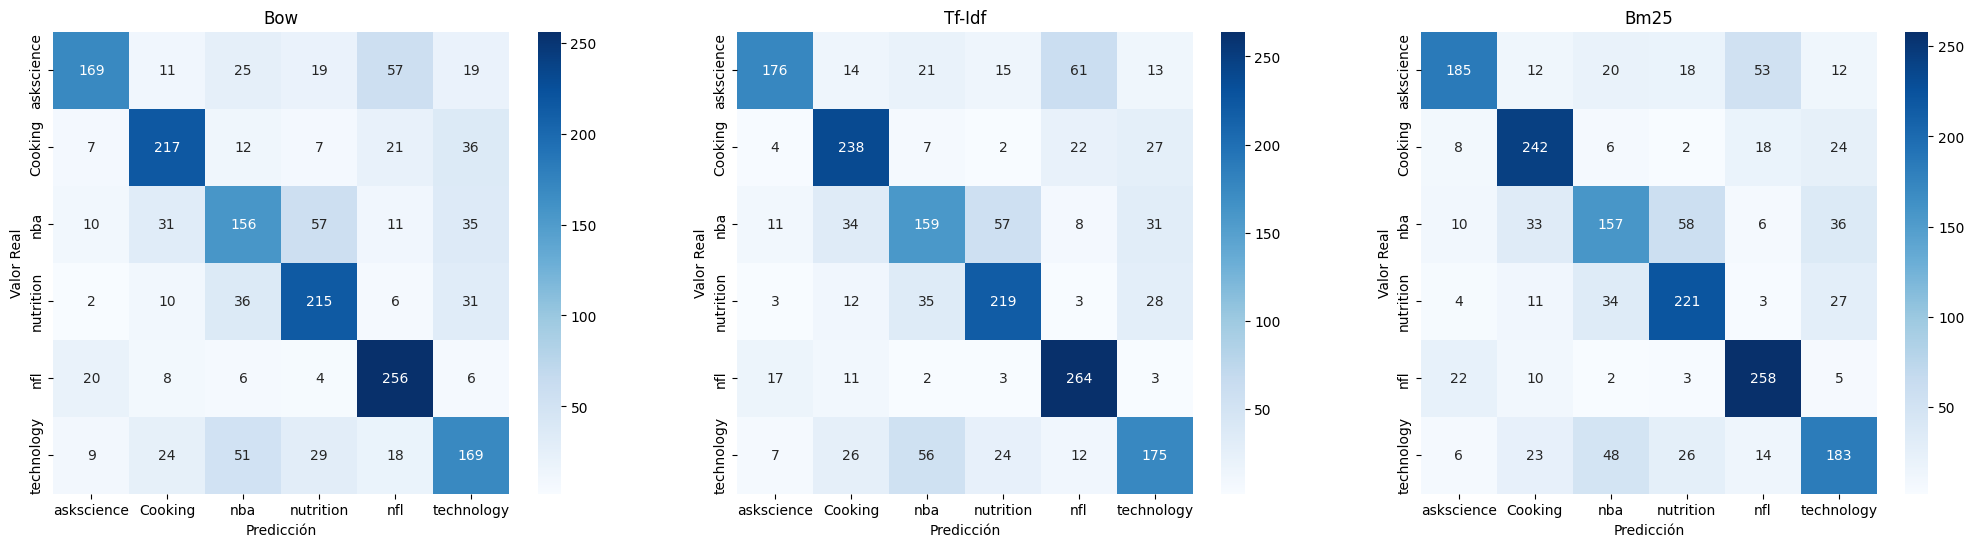

   Modelo  Accuracy  Recall Macro Avg  F1 Macro Avg
0     BoW  0.656667          0.656667      0.653703
1  TF-IDF  0.683889          0.683889      0.679753
2    BM25  0.692222          0.692222      0.688527


,Clase,Precision,Recall,F1-Score,Support
0,Cooking-BoW,0.778802,0.563333,0.653772,300.0
1,askscience-BoW,0.720930,0.723333,0.722130,300.0
2,nba-BoW,0.545455,0.520000,0.532423,300.0
3,nfl-BoW,0.649547,0.716667,0.681458,300.0
4,nutrition-BoW,0.693767,0.853333,0.765321,300.0
5,technology-BoW,0.570946,0.563333,0.567114,300.0
6,Cooking-TF-IDF,0.807339,0.586667,0.679537,300.0
7,askscience-TF-IDF,0.710448,0.793333,0.749606,300.0
8,nba-TF-IDF,0.567857,0.530000,0.548276,300.0
9,nfl-TF-IDF,0.684375,0.730000,0.706452,300.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

pipeline_bow = get_pipeline(pipeline_type = 'bow', ngram_range=(1,1), analyzer='word', stop_words=None, classifier=LinearSVC(random_state=0, tol=1e-5))
bow_report = metrics_and_matrix(df_train.comment, df_train.label, df_test.comment, df_test.label, pipeline_bow)
pipeline_tfidf = get_pipeline(pipeline_type = 'tfidf', ngram_range=(1,1), analyzer='word', stop_words=None, classifier=LinearSVC(random_state=0, tol=1e-5))
tfidf_report = metrics_and_matrix(df_train.comment, df_train.label, df_test.comment, df_test.label, pipeline_tfidf)
pipeline_bm25 = get_pipeline(pipeline_type = 'bm25', ngram_range=(1,1), analyzer='word', stop_words=None, classifier=LinearSVC(random_state=0, tol=1e-5))
bm25_report = metrics_and_matrix(df_train.comment, df_train.label, df_test.comment, df_test.label, pipeline_bm25)


class_names = df.label.unique()

modelos = ['Bow', 'Tf-Idf', 'Bm25']
reports_list =[bow_report['report'], tfidf_report['report'], bm25_report['report']]

show_matrixes(modelos, matrix_list = [bow_report['Confusion Matrix'], tfidf_report['Confusion Matrix'], bm25_report['Confusion Matrix']])

#Defino un diccionario para ir metiendo los resultados de todos los modelos de este ejercicio
classification_models_results = {name: round(report['accuracy'],2) for name, report in zip(modelos, reports_list)}

#Métricas

comparativa1, comparativa2 = comparativas_baseline(reports_list, nombres_modelos = ["BoW", "TF-IDF", "BM25"])
print(comparativa1)
comparativa2

Sabemos que la complejidad de las representaciones vectoriales del texto va en aumento, desde la cuenta cruda de apariciones de cada token en el documento que ofrece Bag of words a la normalización por frecuencia del término en el documento y penalización de términos muy comunes en todos los comentarios que implementa Tf-idf y hasta la variante más sofisticada BM25, que además de normalizar la frecuencia del término aplica una saturación de dicha frecuencia (evitando que un término muy repetido domine la representación) y ajusta el peso según la longitud del documento (penalizando los textos excesivamente largos), consiguiendo así una puntuación más fiel de la relevancia de cada palabra en su contexto.

Las métrica que vamos a considerar principalemente para guiarnos en la comparación general entre los 3 modelos es el acuraccy, esto podemos hacerlo dado que los conjuntos de datos, tanto train como test nos hemos asegurado previamente de que estén balanceados.


En el primer dataframe podemos ver como a medida que la representación es más “rica”, se mejoran las métricas, al disponer el modelo de señales más ajustadas sobre la importancia de cada término.

Tiene claramente un peor desempeño el modelo que usa BoW para la representación del texto, lo cual es entendible dado que este trata por igual a todas las palabras, mientras que los modelos de tfidf y bm25 sí consiguen un rendimento mayor, que principalmente se debe al hecho de que le dan mayor importancia a los términos del texto que sí pueden aportar una distinción real de las características del texto para su clasificación.

En cuanto a la distinción entre clases concretas, vamos a hacer uso del f1 score que como sabemos es la media entre precisión y sensibilidad. Balancea la precisión del modelo al predecir, con su capacidad para detectar correctamente los ejemplos de esa clase.
Destaca que los comentarios de subreddits askscience y nutrition son los que mejor F1 alcanzan, por encima de 0.72 en todos los modelos. Atendiendo a las matrices de confusión vemos como para la clase askscience, la clase con la que tienden a confundirla más el modelo es precisamente nutrition y viceversa. Esta buena distinción de esas clases junto con el hecho de que entre sí se confundan más que con cualquierr otra probablemente se deba al lenguaje que se usan en esos comentarios, seguramente sea más técnico que en los demás subreddits, pero las hace en cierto modo algo más similares entre sí.

Por el otro lado la clase nba tiene el f1 más modesto que ni siquiera consigue sobrepasar el 0.56 en el mejor caso. En las matrices de confusión vemos como se confunde mucho con la clase nfl. Esto es algo totalmente entendible dado que ambas clases tratan sobre dos ligas de deportes muy populares, por lo que tendrán en común un lenguaje en el que tiene un gran peso la jerga deportiva, donde se repetirán mucho palabras como 'players', 'team' o 'match'. También destaca que nba se confunda bastante con tecnology, que a su vez es la segunda clase más modesta en cuanto a f1. Esto probablemente se deba a que en el subreddit de nba, al ser esta una liga mundialmente conocida, tenga muchos usuarios con inquietudes muy distintas y acaben hablando en el hilo sobre temas bastante genéricos, que puedan ser más propios de tecnología que de deporte.

Para tener una mayor distinción entre clases podríamos aplicar características adicionales como ngramas que permitieran capturar ciertas expresiones compuestas por varias palabras que tuvieran mayor relevancia en cuanto a la distinción del subreddit de forma conjunta que por separado. Por ejemplo hay distintas expresiones usadas en el deporte como 'slam dunk' o 'match day' que servirían para distinguir mejor a los subreddits de deportes de los de tecnología.


2.2.2 Modelos Baseline con Ngramas

Vamos a permitir que CountVectorizer extraiga ngramas de hasta tamaño 2 (unigramas y bigramas), para explotar expresiones comunes en los distintos ámbitos analizados. Optamos por no usar trigramas porque a partir de ellos suelen incluirse palabras de función (determinantes, preposiciones) que no añaden valor semántico, sino que funcionan como conectores.

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


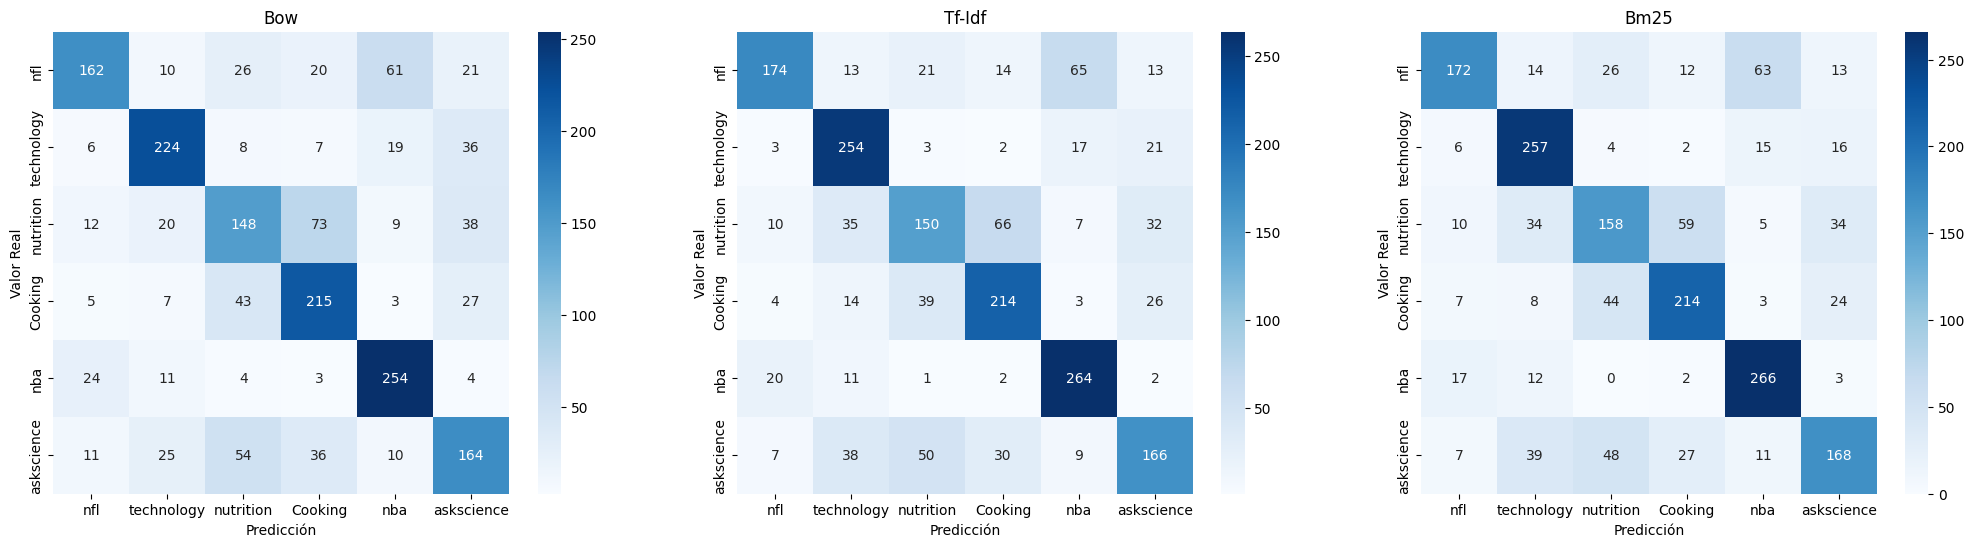

   Modelo  Accuracy  Recall Macro Avg  F1 Macro Avg
0     BoW  0.648333          0.648333      0.644838
1  TF-IDF  0.678889          0.678889      0.672668
2    BM25  0.686111          0.686111      0.680184


,Clase,Precision,Recall,F1-Score,Support
0,Cooking-BoW,0.736364,0.540000,0.623077,300.0
1,askscience-BoW,0.754209,0.746667,0.750419,300.0
2,nba-BoW,0.522968,0.493333,0.507719,300.0
3,nfl-BoW,0.607345,0.716667,0.657492,300.0
4,nutrition-BoW,0.713483,0.846667,0.774390,300.0
5,technology-BoW,0.565517,0.546667,0.555932,300.0
6,Cooking-TF-IDF,0.798165,0.580000,0.671815,300.0
7,askscience-TF-IDF,0.695890,0.846667,0.763910,300.0
8,nba-TF-IDF,0.568182,0.500000,0.531915,300.0
9,nfl-TF-IDF,0.652439,0.713333,0.681529,300.0


In [ ]:
pipeline_bow = get_pipeline(pipeline_type = 'bow', ngram_range=(1,2), analyzer='word', stop_words=None, classifier=LinearSVC(random_state=0, tol=1e-5))
bow_report = metrics_and_matrix(df_train.comment, df_train.label, df_test.comment, df_test.label, pipeline_bow)
pipeline_tfidf = get_pipeline(pipeline_type = 'tfidf', ngram_range=(1,2), analyzer='word', stop_words=None, classifier=LinearSVC(random_state=0, tol=1e-5))
tfidf_report = metrics_and_matrix(df_train.comment, df_train.label, df_test.comment, df_test.label, pipeline_tfidf)
pipeline_bm25 = get_pipeline(pipeline_type = 'bm25', ngram_range=(1,2), analyzer='word', stop_words=None, classifier=LinearSVC(random_state=0, tol=1e-5))
bm25_report = metrics_and_matrix(df_train.comment, df_train.label, df_test.comment, df_test.label, pipeline_bm25)

modelos = ['Bow', 'Tf-Idf', 'Bm25']
show_matrixes(modelos, matrix_list = [bow_report['Confusion Matrix'], tfidf_report['Confusion Matrix'], bm25_report['Confusion Matrix']])

comparativa1, comparativa2 = comparativas_baseline([bow_report['report'], tfidf_report['report'], bm25_report['report']], nombres_modelos = ["BoW", "TF-IDF", "BM25"])
print(comparativa1)
comparativa2


En términos globales, el uso de bigramas arroja un rendimiento ligeramente inferior al de los modelos sin ngramas

A primera vista, podría parecer que los bigramas no aportan valor. Sin embargo, si comparamos bien las matrices de confusión podemos ver como el uso de bigramas consigue en algunso casos mejorar la discriminación entre clases de ámbitos distintos, como por ejemplo entre askscience y cooking,(ciencia vs. cocina) desaparecen varias confusiones mutuas, probablemente porque aparecen expresiones compuestas específicas como “nutritional facts” que ayuden al clasificador a entender mejor el dominio-


Pero por otro lado el uso de los bigramas conlleva un empeoramiento en la distinción entre clases que sí son del mismo ámbito, como es el caso de los deportes.

En deportes, la confusión nba entre nfl aumenta, lo que es lógico dado que tendrán muchos bigramas en común o muy parecidos, lo que diluye la señal entre ambos subreddits. También ocurre en alimentación, entre cooking y nutrition se confunden más, pues tendrán expresiones como “nutritional value” repetidas en ambas clases haciendo que el modelo las encuentre difíciles de separar.

Por lo tanto el uso de bigramas empeora la discriminación entre pares de clases del mismo ámbito, pero permite algo de mejora entre clases de distinto par.

2.2.3 Modelos BaseLine con Procesamiento Léxico y stopwords

Dado que no hemos conseguido mejoría con los bigramas, vamos a intentar aplicar otro enfoque con técnicas más exhaustivas de procesamiento léxico. Vamos a precindir de los emoticonos y de las stopwords, y además aplicamos corrección ortográfica y pasamos todas las palabras a minúsculas. Así podemos explorar como afectan estas medidas a la discrminación de los comentarios.

In [ ]:
import nltk
# Descargamos las stopwords de NLTK
# Si no tenemos instalado NLTK lo instalamos
!pip3 install -U nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def spelling_check(text):
  text = eliminar_emojis(text)
  text = correccion_ortografica(text)
  text = text.lower()
  return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_train['clean_comment'] = df_train['comment'].apply(spelling_check)
df_test['clean_comment'] = df_test['comment'].apply(spelling_check)

In [ ]:
df_train

,thread_id,user,comment,score,date,label,clean_comment
1743,jo112m,ReallyReallySo,Almost had me going until the tidbit about fol...,1,2020-11-05 02:54:47,nutrition,almost had me going until the tidbit about fol...
2196,liarf6,Unknown,One of the funniest memories I have is of groc...,17,2021-02-12 20:37:08,Cooking,one of the funniest memories i have is of groc...
1728,jo112m,pmgreham,"My friend, whilst your point about the negliga...",59,2020-11-04 21:25:14,nutrition,my friend whilst your point about the negligib...
3337,c0ffg2,mic_sick,It took KD and Klay Thompson suffering career ...,-5,2019-06-14 07:42:37,nba,it took ks and kay thompson suffering career a...
298,rqts9j,LegendRazgriz,"Didn't have the most rings or the most wins, b...",40,2021-12-29 00:30:40,nfl,didn't have the most rings or the most wins bu...
...,...,...,...,...,...,...,...
3444,diagb7,RobertDeNiro007,I never liked LeBron but I at least respected ...,0,2019-10-15 19:11:02,nba,i never liked lebanon but i at least respected...
466,b0f2q7,Teves3D,"Ummm yay? I’m afraid of what the giants got, w...",-1,2019-03-12 23:59:53,nfl,um mm ya i’m afraid of what the giants got wha...
3092,1i7kyff,CastAside1812,"This is ridiculous, get this politics crap off...",29,2025-01-22 20:49:26,nba,this is ridiculous get this politics crap off ...
3772,5x3wr2,MD_RMA_CBD,No I don't believe this one...they are red..an...,0,2017-03-02 20:33:26,askscience,no i don't believe this one...they are redunda...


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


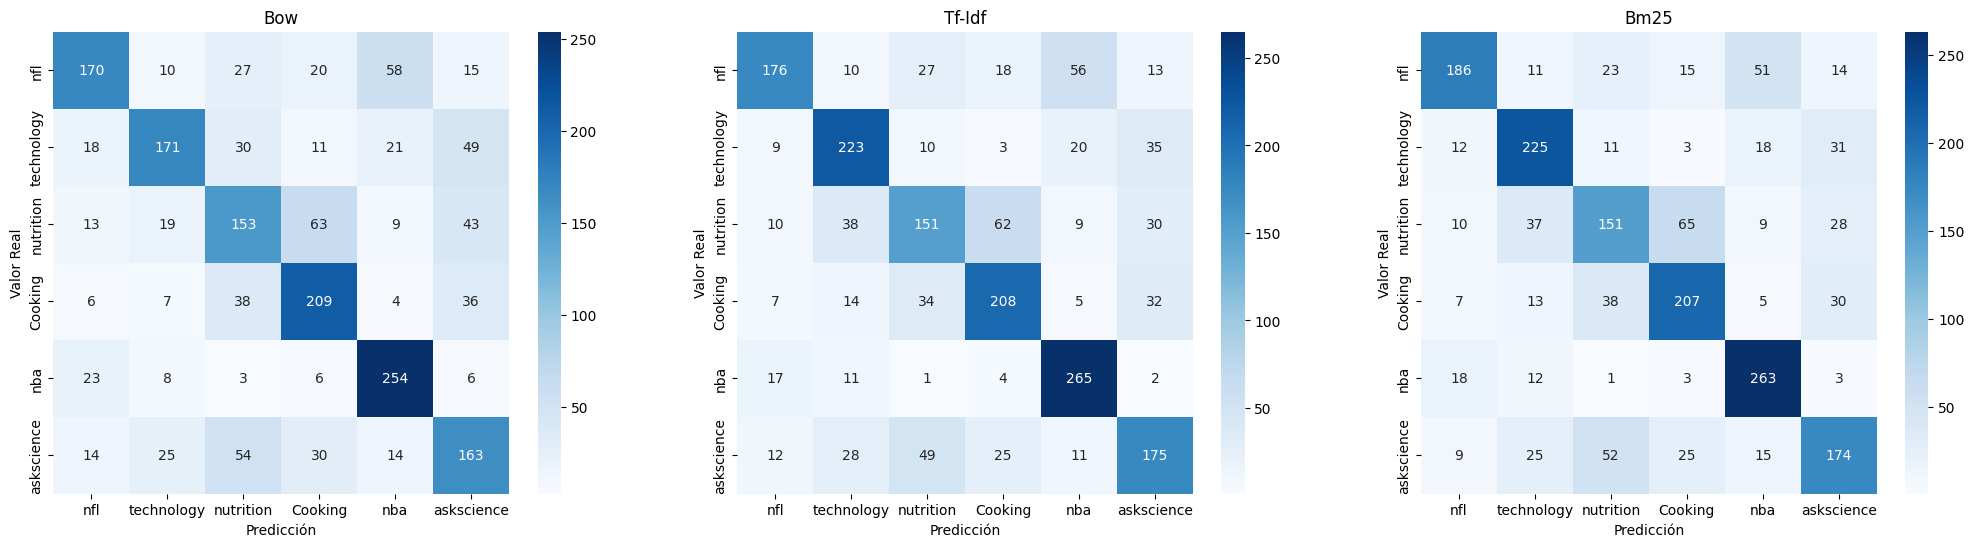

   Modelo  Accuracy  Recall Macro Avg  F1 Macro Avg
0     BoW  0.622222          0.622222      0.620107
1  TF-IDF  0.665556          0.665556      0.661439
2    BM25  0.670000          0.670000      0.666438


,Clase,Precision,Recall,F1-Score,Support
0,Cooking-BoW,0.696721,0.566667,0.625000,300.0
1,askscience-BoW,0.712500,0.570000,0.633333,300.0
2,nba-BoW,0.501639,0.510000,0.505785,300.0
3,nfl-BoW,0.616519,0.696667,0.654147,300.0
4,nutrition-BoW,0.705556,0.846667,0.769697,300.0
5,technology-BoW,0.522436,0.543333,0.532680,300.0
6,Cooking-TF-IDF,0.761905,0.586667,0.662900,300.0
7,askscience-TF-IDF,0.688272,0.743333,0.714744,300.0
8,nba-TF-IDF,0.555147,0.503333,0.527972,300.0
9,nfl-TF-IDF,0.650000,0.693333,0.670968,300.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

pipeline_bow = get_pipeline(pipeline_type = 'bow', ngram_range=(1,1), analyzer='word', stop_words=stopwords, classifier=LinearSVC(random_state=0, tol=1e-5))
bow_report = metrics_and_matrix(df_train.clean_comment, df_train.label, df_test.clean_comment, df_test.label, pipeline_bow)
pipeline_tfidf = get_pipeline(pipeline_type = 'tfidf', ngram_range=(1,1), analyzer='word', stop_words=stopwords, classifier=LinearSVC(random_state=0, tol=1e-5))
tfidf_report = metrics_and_matrix(df_train.clean_comment, df_train.label, df_test.clean_comment, df_test.label, pipeline_tfidf)
pipeline_bm25 = get_pipeline(pipeline_type = 'bm25', ngram_range=(1,1), analyzer='word', stop_words=stopwords, classifier=LinearSVC(random_state=0, tol=1e-5))
bm25_report = metrics_and_matrix(df_train.clean_comment, df_train.label, df_test.clean_comment, df_test.label, pipeline_bm25)


class_names = df.label.unique()

modelos = ['Bow', 'Tf-Idf', 'Bm25']

show_matrixes(modelos, matrix_list = [bow_report['Confusion Matrix'], tfidf_report['Confusion Matrix'], bm25_report['Confusion Matrix']])


#Métricas

comparativa1, comparativa2 = comparativas_baseline([bow_report['report'], tfidf_report['report'], bm25_report['report']], nombres_modelos = ["BoW", "TF-IDF", "BM25"])
print(comparativa1)
comparativa2

Al aplicar las técnicas de procesamiento léxico anterior obtenemos modelos con un peor desempeño aún. Esto no es casualidad, si no que tiene un importante transforndo:

-Al pasar todo el texto a minúsculas,se produce una pérdida de la distinción de entidades, por ejemplo el modelo no sabe distinguir entre “Apple” (la compañía) y “apple” (la fruta), eliminando una información valiosa para subreddits como technology vs cooking.
También afeta a acrónimos y siglas como “NASA”, “GPU” o “CPU”, lo que hace que pierdan su forma reconocible, por ejemplo al cambiar por “nasa” o “gpu”, modelos tan simples como estos podrían no captar que son términos muy asociados a ciencia o tecnología.
La reducción a minúsculas puede provocar también dificultad de percepción del énfasis. En muchos comentarios los usuarios pueden hacer uso de forma intencional de mayúsculas para enfatizar o expresar emociones como por ejemplo“UP UP and AWAY! SUPER WASHED Ain’t He?!”, “THREE-POINTER”, al homogeneizarlo todo, se pierde esa característica estilística.


-En cuanto a la eliminación de emoticonos, suponen una clara desventaja al desaparecer del tono emocional, los emoticonos suelen se propios de contextos informales característicos de subreddits como nba o cooking, que son menos técnicos y su eliminación borra esa importante característica discriminatoria.
Además hay usuarios que incluso sustituyen las palabras por los emoticonos que significan lo mismo, o usan esos emoticonos como símbolo o parte de la jerga del subreddit al quitarlos se desvanece esa pista. (por ejemplo un balon de futbol americano probablemente sería un emoticono muy usado en el subreddit de nfl)


-La eliminación de stopwords supone en algunos casos la pérdia de patrones de estilo, dado que hay subreddits que usan construcciones gramaticales características (“I’m not sure…”) al borrar esas palabras se borran indicios que ayuden a distinguir entre clases. También supone la ruptura de expresiones compuestas. Y si estas expresiones son muy dependientes de la stopword (“not”, “no”, “the”) para invertir o matizar el sentido al eliminarlas hace que se pierda parte del contexto.


-Por último la corrección ortográfica, en muchos casos no es del todo eficiente, dado que comete muchas sustituciones erróneas de jerga o nombres propios, llegando a cambiar “LeBron” por “Lebanon” o 'red and' por redundant, distorsionando términos que pueden ser clave de cada subreddit. (Ambos ejemplos han ocurrido entre los comentarios que visualizamos de train al aplicarles el procesamiento por corrección ortográfica)

Además hace desaparecer abreviaturas o expresiones modernas, como (“lol”, “omg”), así como errores intencionados (“4u”, “bc”) que claramente indican un lenguaje informal que pueda ser característicos de una comunidad. Corregir esto uniformiza el lenguaje y borra esa valiosa información para esta tarea de clasificación.

En conclusión la aplicación de ciertas técnicas de procesamiento del lenguaje que puedan resultar demasiado exhaustivas provocan la homogeneización de los comentarios, privando al modelo de ciertas características propias del subreddit al que pertenecen que podrían ayudar mucho a distinguir subreddits.


# PASO 2.3 Entrenar modelos codificando con word embeddings de Fasttext

El segundo sistema estará basado en Fasttext y se usará
modelos de clasificación sencillos como son los Support Vector Machines (SVM)


Fasttext a diferencia de Glove tiene capacidad para manejar palabras desconocidas, gracias a que trabaja con subwords, o como nosotros lo conocemos char-ngramas. FastText no representa una palabra como un único vector, como sí hace Word2Vec o GloVe, sino que la descompone en pequeños conjuntos de caracteres y luego promedia los vectores de esos trozos para formar el embedding final de la palabra. Esto le permite construir un vector útil si aparece una palabra nueva (o con error gramatical), usando para ello la descomposición en char-ngramas y combinando los vectores que ya tenga preentrenados para algunos de esos char-ngramas que conforman la palabra. También le ayuda a capturar similitudes entre palabras de la misma familia léxica, dado que tengan la misma raiz.


https://fasttext.cc/docs/en/english-vectors.html

En la página web de fasttext tenemos un amplio conjunto de modelos de representación vectorial, o word embeddings que podemos usar. En nuestro caso nos hemos decidido por dos. Queremos comparar dos modelos FastText, uno más completo y pesado, cc.en.300.bin, y otro más ligero, wiki-news-300d-1M-subword.vec, para evaluar cómo la carga en memoria y el rendimiento práctico se ven afectados en tareas como clasificación o embeddings de frases.

`cc.en.300.bin` : Según la APi  este modelo es más completo y preciso, útil cuando se busca máxima cobertura semántica, incluyendo palabras raras, errores ortográficos o neologismos. Fue entrenado con Common Crawl y Wikipedia.
Se trata de un modelo CBOW o Continuous Bag of Words, lo que quiere decir que aprende los vectores de palabras al predecir una palabra objetivo usando las palabras que la rodean como contexto. Además como hemos explicado antes, emplea subwords (char n-grams de tamaño 5). El tamaño del vocabulario es de 2 millones de palabras
Y además cabe destacar que nos viene en formato binario (.bin), esto es algo importante a distinguir, dado que en este formato incluye todo el modelo entrenado, tanto la arquitectura CBOW, como los parámetros del entrenamiento y los vectores de subwords. Esto permite poder cargarlo con la librería fasttext directamente sin tener que añadir ninguna otra alternativa.


`wiki-news-300d-1M-subword.vec` : Este modelo es más ligero y eficiente para tareas rápidas o en entornos con recursos limitados, aunque puede tener menor cobertura para palabras neuvas, poco frecuentes o mal escritas.
Se entrenó con una combinación de Wikipedia y un corpus de noticias. Se trata de un modelo que se entrenó aplicando Skip-gram con subwords. En este enfoque al modelo se le proporciona un token central y debe ser capaz de predecir los tokens de alrededor que forman su contexto.
Este modelo presenta un vocabulario que es la mitad que el anterior, 1 millón de palabras más frecuentes. Por lo que va a ser más ligero en RAM.
EL formato en el que nos viene este modelo es .vec, es decir solo tenemos la tabla con los vectores preentrenados, y no permite inferencia sobre palabras nuevas. Además tendremos que hacer uso nosotros de la librería gensim para poder cargar el modelo y esta no tiene una función que nos devuelva directamente los sentence embeddings del texto, por lo que tendremos que crear unas fucniones auxiliares que lo hagan por nosotros.


Cuando cargamos un modelo de FastText, lo que ocurre es que se carga todo el vocabulario y los vectores en memoria RAM.
Estos vectores son de 300 dimensiones por palabra, y hay millones de palabras/subpalabras en el vocabulario (2 millones en cc.en.300.bin y 1 millón en wiki-news-300d-1M-subword.vec).


### Comparativa de modelos FastText en inglés

| Modelo                          | Tamaño aprox. RAM | Cobertura léxica       | Descripción                                             |
|---------------------------------|-------------------|------------------------|---------------------------------------------------------|
| `wiki-news-300d-1M-subword.vec` | ~2 GB             | Wikipedia + noticias   | Equilibrio perfecto entre tamaño y cobertura            |
| `cc.en.300.bin`                 | ~7 GB             | Common Crawl (enorme)  | Máxima cobertura, pero muy pesado (difícil para Colab). |



In [ ]:
# Instalamos la librería Fasttext y descargamos el modelo preentrenado para el español en binario

import fasttext
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
!gzip -d cc.en.300.bin.gz

!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.vec.zip
!unzip wiki-news-300d-1M-subword.vec.zip

--2025-05-18 18:36:25--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.124, 108.157.254.102, 108.157.254.121, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   327MB/s    in 14s     

2025-05-18 18:36:40 (298 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]

--2025-05-18 18:37:40--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.124, 108.157.254.102, 108.157.254.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 587879973 (561

Tras descargar y descomprimir los modelos, vamos a definir las siguientes funciones que nos van a permitir trabajar con los word embeddings de fasttext.
La primera `load_fasttext_model` toma el nombre del modelo, y según su extensión lo carga con la propia librería fasttext (.bin) o con la librería gensim (.vec), finalmente devuelve el modelo cargado en una variable.

La segunda función `manual_sentence_embedding` la construimos como una función auxiliar que nos permita tomar los vectores de palabras y con ellos sacar un sentence embedding completo de todo el comentario. Para ello seguimos un enfoque 'naïve' que tan solo saca la media de los word embeddings que componen el texto para así formar el sentence embedding. Pero si que es cierto que en fasttext la fucnión get_sentence_vector despues de sacar la media de los word embeddings al embedding resultante lo hace unitario dividiéndolo por su norma antes de devolverlo.

La última función `function_selector` simplemente selecciona que función usar dependiendo de la extensión del modelo. Elige entre get_sentence_vector de fasttext y manual_sentence_embedding que hemos creado.

In [ ]:
from gensim.models.keyedvectors import KeyedVectors
import fasttext
def load_fasttext_model(model):
  if model.endswith(".bin"):
    """Modelo más complejo de Wikipedia
    Este es extensión .vec, por lo que no se puede cargar por medio de fasttext.load_model(), sino que se debe hacer a través de la KeyedVectors de gensim"""
    return fasttext.load_model(model)
  elif model.endswith(".vec"):
    """Modelo cc.en.bin muy completo pero demasiado pesado en RAM"""
    return KeyedVectors.load_word2vec_format(model)

def manual_sentence_embedding(text, model):

  """Podríamos añadirle a estas funciones una normalización L2 antes de retornarlos para que haga lo mismo que en la función get_sentence_vector de fastesxt
    Ver ejemplo en la respuesta de https://stackoverflow.com/questions/54181163/fasttext-embeddings-sentence-vectors"""

  vec = np.zeros(model.vector_size)
  count = 0
  for word in text.split():
      if model.has_index_for(word):
          vec += model.get_vector(word)
          count += 1
  return vec / count if count > 0 else vec


def function_selector(model_name, ft_model):
  if model_name.endswith(".bin"):
    function = lambda x: ft_model.get_sentence_vector(x)
  else:
    function = lambda x: manual_sentence_embedding(x, ft_model)
  return function


Resultados sentence embeddings Fasttext cc.en.300.bin ----- Accuracy: 0.7216666666666667
              precision    recall  f1-score   support

     Cooking       0.82      0.62      0.70       300
  askscience       0.73      0.89      0.80       300
         nba       0.59      0.59      0.59       300
         nfl       0.70      0.70      0.70       300
   nutrition       0.76      0.88      0.81       300
  technology       0.75      0.66      0.70       300

    accuracy                           0.72      1800
   macro avg       0.72      0.72      0.72      1800
weighted avg       0.72      0.72      0.72      1800

Resultados sentence embeddings Fasttext wiki-news-300d-1M-subword.vec ----- Accuracy: 0.6277777777777778
              precision    recall  f1-score   support

     Cooking       0.72      0.54      0.62       300
  askscience       0.61      0.88      0.72       300
         nba       0.52      0.35      0.42       300
         nfl       0.56      0.73      0.63   

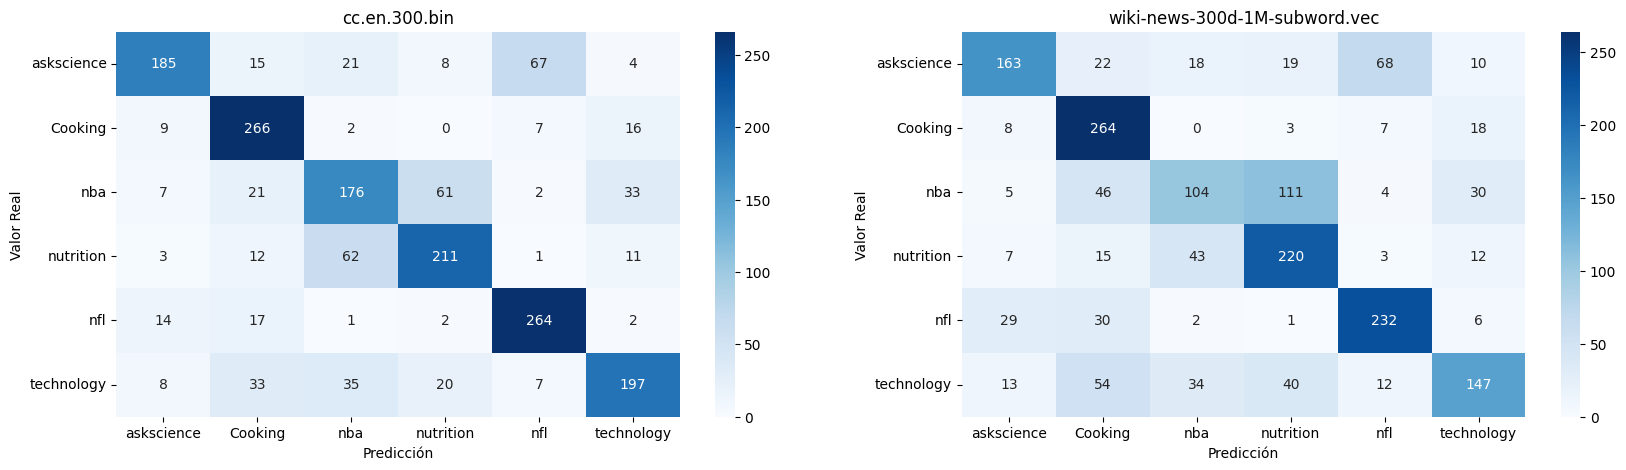

In [ ]:
import gc
from sklearn.svm import LinearSVC


#Elegimos con que función sacamos los sentence embeddings y después aplicamos la función elegida para poder sacar dichos sentence embeddings
#Si el nombre del modelo termina en .bin tenemos que se habrá cargado con fasttext.load_model() y por tanto tiene la función .get_sentence_vector
#De lo contrario el modelo será .vec y hay que sacar el sentence embedding por medio de una función que contruimos nosotros manual_sentence_embedding
matrixes = []
modelos = ["cc.en.300.bin", "wiki-news-300d-1M-subword.vec"]
for model_name in modelos:

  ft_model = load_fasttext_model(model_name)
  function = function_selector(model_name, ft_model)

  fasttext_sentence_train = df_train['comment'].apply(function)
  fasttext_sentence_test = df_test['comment'].apply(function)

  #Borrado del modelo para evitar sobrecargar la memoria RAM
  del ft_model
  gc.collect()

  clf_sentence_embeddings = LinearSVC(random_state=0, tol=1e-5).fit(fasttext_sentence_train.to_list(), df_train.label)
  predicted_fasttext = clf_sentence_embeddings.predict(fasttext_sentence_test.to_list())

  classification_models_results[model_name] = round(np.mean(predicted_fasttext == df_test.label), 2)
  print(f"Resultados sentence embeddings Fasttext {model_name} ----- Accuracy:", np.mean(predicted_fasttext == df_test.label))
  from sklearn import metrics
  print(metrics.classification_report(df_test.label, predicted_fasttext))


  cm = confusion_matrix(df_test.label, predicted_fasttext)
  matrixes.append(cm)


show_matrixes(modelos, matrixes, columns = 2, figsize = ((20, 5)) )


Apreciamos claramente como el modelo más complejo de representación vectorial, cc.en.300.bin, mejora a los modelos baseline, lo cual probablemente se deba a su capacidad para generar vectores para palabras nuevas a partir de los vectores de otros subwords que ya tenía.

Sin embargo el modelo FastText entrenado sobre Wikipedia, wiki-news-300d-1M.vec aunque ocupa menos espacio en disco, su incapacidad para incorporar palabras nuevas, limita gravemente su cobertura de un vocabulario como el de Reddit, que es propio de una jerga bastante distinta e informal en comparación con el de wikipedia en el que se entrenó. Esto se traduce en un peor rendimiento no solo respecto al otro modelo de fasttext, sino que peor incluso que los modelos baseline más simples.

Podemos decir entonces que en este caso el mayor consumo de recursos del modelo
cc.en.300.bin, estaría justificado al conseguir mejores resultados que su opente directo wiki-news-300d-1M.vec. Además debemos poner de manifiesto que entre el uso de un modelo demasiado sencillo de fasttext, que no pueda generar vectores de nuevas palabaras al ser extensión .vec, y que además se haya entrenado con un corpus muy distinto, sería preferible aplicar una representación bm25, dado que llevaría al modelo a obtener un poder discriminante mayor.

Para estos modelos fasttext destaca sobretodo la confusión que tienen entre los subreddits de nba y de nutrition, esto no era tan significativo en los modelos baseline anteriores. Esto puede deberse al uso en esos subreddits de vocabulario compartido relacionado con varias disciplinas distintas como salud, rendimiento físico o entrenamiento, lo que puede amplificar la confusión entre clases si el modelo no está adaptado específicamente al lenguaje de Reddit, como no es el caso. Al no estar entrenado específicamente en lenguaje de Reddit, el modelo FastText puede no captar adecuadamente expresiones propias de la plataforma. En contraste, enfoques como TF-IDF o BM25 generan vectores directamente a partir del contenido textual del comentario, lo que les permite reflejar con mayor precisión las diferencias léxicas entre clases incluso cuando se utilizan términos similares.



***¿Afecta mucho en el desempeño del modelo la longitud del embedding?***

Vamos a probar a comprimir las representaciones del modelo de fasttext en formato .bin. Solo lo hacemos en este dado que la función  .reduce_model, solo es aplicable a los modelos que se cargan con la librería fasttext.

Nueva Dimensionalidad vectores:  100
Resultados sentence embeddings Fasttext cc.en.300.bin ----- Accuracy: 0.66
              precision    recall  f1-score   support

     Cooking       0.80      0.63      0.70       300
  askscience       0.75      0.83      0.79       300
         nba       0.43      0.33      0.38       300
         nfl       0.56      0.69      0.62       300
   nutrition       0.70      0.84      0.76       300
  technology       0.71      0.64      0.67       300

    accuracy                           0.66      1800
   macro avg       0.66      0.66      0.65      1800
weighted avg       0.66      0.66      0.65      1800



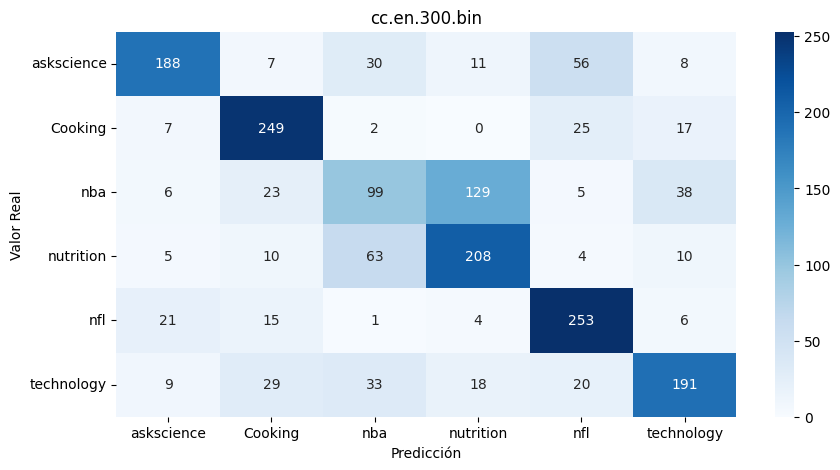

In [ ]:
import gc
from sklearn.svm import LinearSVC
import fasttext.util

modelos = ["cc.en.300.bin"]
matrixes = []
for model_name in modelos:

  ft_model = load_fasttext_model(model_name)
  fasttext.util.reduce_model(ft_model, 100)
  print('Nueva Dimensionalidad vectores: ',ft_model.get_dimension())
  function = function_selector(model_name, ft_model)

  fasttext_sentence_train = df_train['comment'].apply(function)
  fasttext_sentence_test = df_test['comment'].apply(function)

  #Borrado del modelo para evitar sobrecargar la memoria RAM
  del ft_model
  gc.collect()

  clf_sentence_embeddings = LinearSVC(random_state=0, tol=1e-5).fit(fasttext_sentence_train.to_list(), df_train.label)
  predicted_fasttext = clf_sentence_embeddings.predict(fasttext_sentence_test.to_list())

  print(f"Resultados sentence embeddings Fasttext {model_name} ----- Accuracy:", np.mean(predicted_fasttext == df_test.label))
  from sklearn import metrics
  print(metrics.classification_report(df_test.label, predicted_fasttext))


  cm = confusion_matrix(df_test.label, predicted_fasttext)
  matrixes.append(cm)

show_matrixes(modelos, matrixes, columns = 1, figsize = ((10, 5)) )

Al reducir la dimensión de los embeddings conseguimos algunas ventajas como un menor uso de memoria RAM, y un menor tiempo de ejecución. Sin embargo la compresión de la representación del texto está sujeta a pérdidas de información, de tal forma que cuanto más se comprimen, es decir cuanto menor es la dimensión de la codificación, mas información se desprecia.

Esta podría ser la causa de haber conseguido bastante peores resultados que en el modelo anterior, sobretodo al haber reducido tanto la dimensión, de un espacio de 300 compoenentes a otro de 100. Quizás con una compresión menos exahustiva podríamos conseguir reducir parte del 'ruido' de los datos que nos pudiera estar provoncando la consfusión entre algunas de las clases, y al mismo tiempo mantener suficiente información semántica para que el modelo distinga mejor entre subreddits con vocabulario parcialmente solapado.

La reducción tan drástica de 300 a 100 dimensiones habrá eliminado características clave que ayudaban a capturar matices específicos de cada comunidad, como tecnicismos o jergas.


# PASO 2.4 Tercer sistema basado en modelos fine-tuning de modelos Transformers preentrenados para la clasificación de texto

En este último sistema, usaremos modelos de fine-tuning de modelos de Transformers preentrenados para la clasificación de texto, emplearemos los modelos RoBerta y mDeBerta y compararemos sus resultados.


In [ ]:
#Para inducir reproducibilidad.

import torch
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [ ]:
# Importamos las librerías necesarias de transformers
!pip install transformers sentencepiece torch accelerate evaluate



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

**ELECCIÓN DEL MODELO**

Que un modelo sea case-sensitive o uncased puede influir bastante dependiendo del tipo de texto con el que estés trabajando y de la tarea específica.

**Case-sensitive:** El modelo distingue entre mayúsculas y minúsculas. Por ejemplo, "Apple" (la empresa) y "apple" (la fruta) se tratan como tokens diferentes.

**Uncased:** El modelo no distingue mayúsculas/minúsculas, trata "Apple" y "apple" como la misma palabra (ambas se tokenizan igual).

En nuestro caso queremos preservar el estilo original del texto.
Y nos importa la diferencia entre nombres propios y comunes, por lo que es preferible el uso de un modelo que sea Case-Sensitive.

Es cierto que utilizar un modelo que no distingue entre mayúsculas y minúsculas (uncased) permite reducir el tamaño del vocabulario, lo que generalmente se traduce en un modelo más ligero y eficiente. Sin embargo, esta simplificación implica una pérdida de información contextual importante ya que el modelo no puede diferenciar entre palabras cuya capitalización aporta significado, como nombres propios o términos formales. Ante esto preferimos un modelo más lento pero más preciso.



En nuestro caso vamos a optar por el modelo `'distilbert/distilroberta-base'`
https://huggingface.co/distilbert/distilroberta-base

La elección del modelo distilroberta-base para realizar fine-tuning en una tarea de clasificación con datos de Reddit conlleva varias ventajas importantes, especialmente en nuestro caso que buscamos un equilibrio entre rendimiento y eficiencia computacional.
En primer lugar este modelo se trata de una versión destilada de RoBERTa.
Un modelo destilado es una versión más pequeña y eficiente de un modelo grande (teacher model) que ha sido entrenada para imitar su comportamiento. Este proceso tiene como objetivo transferir el conocimiento del modelo original a un modelo más ligero (student model) que conserve un rendimiento similar pero con menor coste computacional.

Por lo tanto este modelo es significativamente más ligero que sus versiones completas, como roberta-base o bert-large, lo que se traduce en un menor uso de memoria RAM y una reducción considerable en el tiempo de entrenamiento e inferenci, sin una gran pérdida de precisión. Tiene un menor número de capas transfomers, 6, frente a su modelo teacher, roberta-base, que tiene 12 capas transformers.

Esta eficiencia lo convierte en una opción especialmente adecuada cuando se dispone de recursos computacionales limitados y se desea acelerar el desarrollo, como es nuestro caso.

Además, distilroberta-base como dice en su página de hugginface es un modelo case-sensitive por lo que hace distinción entre mayúsculas. Tampoco es multilingüe, sino que solo se entrenó con texto en inglés lo cual lo hace más ligero que un multilingüe y más especificado para tareas en inglés como es nuestro caso.

In [ ]:
def categorical_indexer(labels = df.label.unique()):
  label2id = {label: i for i, label in enumerate(labels)}
  id2label = {i: label for label, i in label2id.items()}
  return id2label, label2id

En pythorch para poder entrenar es necesario que codifiquemos las etiquetas como números.

In [ ]:

#RoBERTa
path_model = 'distilbert/distilroberta-base' #path_Modelo destilado de Roberta, por lo que es No multilingüe y cased (case sensitive)


In [ ]:
# Importamos las librerias necesarias
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, DataCollatorWithPadding, Trainer
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from evaluate import load
import pandas as pd
import numpy as np
import torch
import random
import json


# Fijamos semilla para garantizar reproducibilidad.
# Lo importante no es el valor de # la semilla, sino el hecho de fijarla.
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)


En esta celda siguiente cargamos tanto el modelo como el tokenizador. Y además le asignamos al modelo una configuración interna que mapea cada índice numérico a su etiqueta textual correspondiente y viceversa.

In [ ]:

id2label, label2id = categorical_indexer(labels = df.label.unique())

df_train['_label'] = df_train['label'].apply(lambda x: label2id[x])
df_test['_label'] = df_test['label'].apply(lambda x : label2id[x])

# Cargamos el tokenizer
tokenizer = AutoTokenizer.from_pretrained(path_model)

class_model_pytorch = AutoModelForSequenceClassification.from_pretrained(path_model, num_labels=len(id2label))

# Le pasamos la traducción de las etiquetas al modelo
class_model_pytorch.config.id2label = id2label
class_model_pytorch.config.label2id = label2id


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilbert/distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


En esta clase que es parte del código aportado por el profesorado durante las sesiones de prácticas, se convierten los datos pasados, en nuestro caso los comentarios ya tokenizados y su etiqueta, y se convierten en un objeto que PyTorch puede usar directamente para entrenar el modelo.

In [ ]:
# En pytorch, los datasets se preparan de manera distinta a Tensorflow
class PLNEDataset(torch.utils.data.Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

Preparamos los datos para comenzar con el entrenamiento. Para ello los tokenizamos y una vez tokenizados creamos el dataset propio de pytorch.

In [ ]:
# Definimos el porcentaje train/evaluación
p_train = 0.80
p_eval = 0.20

# Mezclamos el dataset de entrenamiento de manera aleatoria, si no se hizo al comienzo del ejercicio,
#al cargar los datos de los archivos .json
# Gracias a esto eliminamos el posible sesgo que el orden de los datos podría producir
# df_train.sample(frac=1, random_state=42)

# Partimos el conjunto de train en train y evaluación
df_train, df_eval = train_test_split_dataframes(df_train, test_size = p_eval)

#Procesamos/tokenizamos los comentarios
tokenized_train_dataset = tokenizer(df_train.comment.tolist(),  truncation=True, padding = True)
tokenized_eval_dataset = tokenizer(df_eval.comment.tolist(), truncation=True, padding = True)
tokenized_test_dataset = tokenizer(df_test.comment.tolist(), truncation=True, padding = True)

# Como antes, las etiquetas deben ser numéricas para poder entrenar.
# Preparamos los 3 datasets para hacer el finetuning
train_dataset = PLNEDataset(tokenized_train_dataset, df_train._label.tolist())
eval_dataset = PLNEDataset(tokenized_eval_dataset, df_eval._label.tolist())
test_dataset = PLNEDataset(tokenized_test_dataset, df_test._label.tolist())





`tokenizer(df_train.comment.tolist(),  truncation=True, padding = True)`

Es importante tener en cuenta que los modelos BERT y sus derivados, como RoBERTa, tienen una longitud máxima de entrada limitada a 512 tokens. Por tanto, si un texto excede ese límite durante el preprocesamiento, debe ser truncado para que el modelo pueda procesarlo correctamente. Al truncar los comentarios que superan el límite de 512 tokens, los tokens que se encuentran más allá de esa posición se eliminan, lo que implica una pérdida de información. Esto puede ser muy perjudicial si las partes más informativas o contextualmente importantes del comentario se encuentran al final del texto.

En nuestro caso, no debería de ser un gran problema dado que estamos trabajando con comentarios en una red social que no son excesivamente largos.

Si quisiéramos conservar más tokens podríamos optar por modelos de mayor capacidad de entrada


Con la siguiente función compute_metrics podemos calcular la métrica de evaluación durante el entrenamiento. En nuestro caso elegimos la accuracy, dado que las clases ya nos aseguramos en apartados anteriores que estan balanceadas.

In [ ]:
def compute_metrics(eval_pred):

  # Utilizamos la accuracy para evaluar
  metric = load("accuracy")

  # Extraemos las predicciones (logits) y las etiquetas reales (labels)
  logits, labels = eval_pred

  # Obtenemos la clase mayoritaria para cada ejemplo
  predictions = np.argmax(logits, axis=-1)

  # Mostramos el classification_report
  print(classification_report(labels, predictions, digits=6))

  return metric.compute(predictions=predictions, references=labels)

Por último llevamos a cabo el entrenamiento, con solo 4 epochs.

In [ ]:

############## Definición de hiperparámetros de entrenamiento y de trainer ############

training_args = TrainingArguments (
  output_dir = './results', # donde guardar el modelo entrenado
  logging_dir = './logs', # donde guardar los logs del entrenamiento
  num_train_epochs=4,  # Número de épocas (pocas)
  eval_strategy="epoch",  # Estrategia de evaluación (epoch / step)
  save_strategy="epoch", # Estrategia de guardado del modelo (epoch / step)
  per_device_train_batch_size = 16, # Tamaño del batch para entrenamiento
  per_device_eval_batch_size = 64, # Tamaño del batch para evaluación
  metric_for_best_model="accuracy",  # Métrica usada para elegir el mejor modelo
  save_total_limit=1, # Número máximo de checkpoints a guardar
  load_best_model_at_end=True, # Carga el mejor modelo al final
  report_to="none"  # Desactiva wandb (Weights and Biases)
)

# Se encarga de partir el texto en lotes (batches) y añadir el padding necesario
# Usamos un DataCollatorWithPadding para padding dinámico
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Objeto que simplifica el proceso de entrenamiento y evaluación
trainer = Trainer (
    model = class_model_pytorch, # modelo
    args = training_args, # hiperparámetros de entreamiento
    train_dataset = train_dataset, # conjunto de train
    eval_dataset = eval_dataset, # conjunto de evaluacion
    compute_metrics = compute_metrics, # funcion de evaluación
    data_collator=data_collator
)

############## Entrenamiento del modelo ##############
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.727344,0.770667
2,No log,0.799421,0.763333
3,0.351000,1.057315,0.764000
4,0.351000,1.144576,0.768667


              precision    recall  f1-score   support

           0   0.840237  0.568000  0.677804       250
           1   0.914163  0.852000  0.881988       250
           2   0.563636  0.744000  0.641379       250
           3   0.866920  0.912000  0.888889       250
           4   0.897321  0.804000  0.848101       250
           5   0.661922  0.744000  0.700565       250

    accuracy                       0.770667      1500
   macro avg   0.790700  0.770667  0.773121      1500
weighted avg   0.790700  0.770667  0.773121      1500

              precision    recall  f1-score   support

           0   0.789474  0.600000  0.681818       250
           1   0.939086  0.740000  0.827740       250
           2   0.702222  0.632000  0.665263       250
           3   0.780731  0.940000  0.852995       250
           4   0.853175  0.860000  0.856574       250
           5   0.602985  0.808000  0.690598       250

    accuracy                       0.763333      1500
   macro avg   0.777945

TrainOutput(global_step=676, training_loss=0.2787044838335387, metrics={'train_runtime': 270.0256, 'train_samples_per_second': 39.996, 'train_steps_per_second': 2.503, 'total_flos': 1430749959782400.0, 'train_loss': 0.2787044838335387, 'epoch': 4.0})

Durante las 4 épocas el modelo consigue alcanzar una precisión en validación bastante buena de en torno al 77%, lo que mejora bastante al las precisiones de todos los modelos anteriores

PREDICCIONES SOBRE TEST


              precision    recall  f1-score   support

           0   0.915493  0.866667  0.890411       300
           1   0.852830  0.753333  0.800000       300
           2   0.527352  0.803333  0.636724       300
           3   0.835366  0.913333  0.872611       300
           4   0.853333  0.640000  0.731429       300
           5   0.800830  0.643333  0.713494       300

    accuracy                       0.770000      1800
   macro avg   0.797534  0.770000  0.774111      1800
weighted avg   0.797534  0.770000  0.774111      1800

{
  "test_loss": 0.6926141977310181,
  "test_accuracy": 0.77,
  "test_runtime": 12.6144,
  "test_samples_per_second": 142.694,
  "test_steps_per_second": 2.299
}


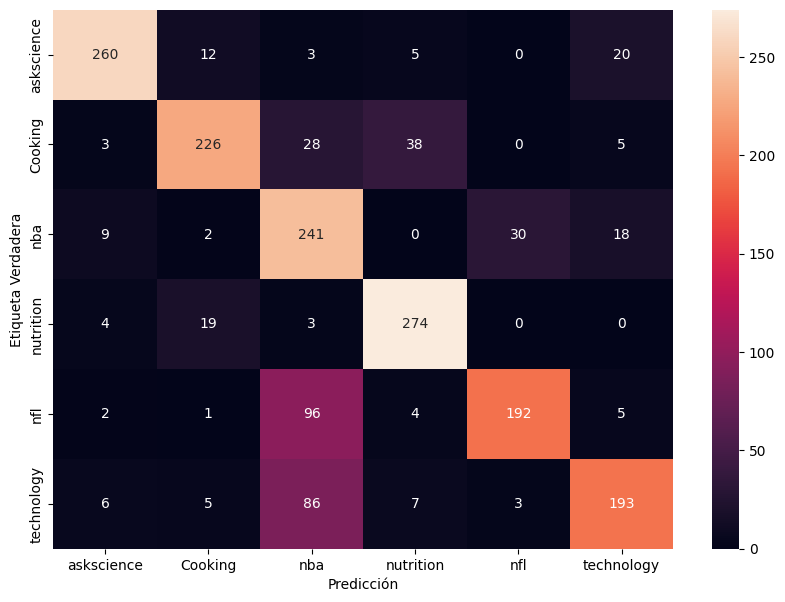

In [ ]:
# ############## Evaluación del modelo ##############
# print ("PREDICCIONES SOBRE EVAL")
# class_model_pytorch.eval()
# print (json.dumps(trainer.evaluate(), indent = 2))

print ("PREDICCIONES SOBRE TEST")
predictions = trainer.predict(test_dataset)
print(json.dumps(predictions.metrics, indent = 2))


#Hago matriz de confusión para los datos de test
class_names = df.label.unique()
preds = np.argmax(predictions[0], axis=1)
cm_bert = confusion_matrix(df_test._label, preds)
classification_models_results[path_model] = round(np.mean(preds == df_test._label), 2)
plt.figure(figsize = (10,7))
sn.heatmap(cm_bert, annot=True, fmt="d",xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.show()

El modelo destilado de RoBerta mejora significativamente el desempeño de los demás modelos probados durante el estudio, consiguiendo una precisión de entorno al 77%. Esto es claramente un síntoma de como los transformers han conseguido cambiar las reglas del juego por como modelan la autoatención.

Los modelos Transformers como BERT/DistilRoBERTa no solo consideran las palabras de forma aislada, sino que modelan su significado en función de todas las demás palabras de la frase. Gracias al mecanismo de autoatención, el modelo puede decidir a que partes del texto asignar más peso, según su relevancia para interpretar el significado de cada token. Además, el uso de múltiples cabezas de atención le permite capturar distintos tipos de relaciones contextuales de forma paralela, lo que mejora su capacidad para manejar ambigüedades, frases complejas, jergas, o incluso ironías. Esta riqueza contextual lo hace especialmente eficaz en entornos con lenguaje informal y variado, como los comentarios de Reddit.

Esto no ocurre ni en tfidf o bm25, dado que son métodos basados en frecuencia de términos, que no capturan relaciones entre palabras, ni estructura gramatical. Por lo que no entienden el orden ni el contexto.
Tampoco ocurre con los modelos de fasttext que igualmente siguen representando las frases como el promedio de embeddings de palabras, sin tener en cuenta el orden ni la dependencia entre palabras, por lo que no puede entender matices sintácticos o semánticos complejos.


Las principales clases entre las que mayor confusión tiene este modelo transformers a la hora de clasificar son, nba y nfl lo cual es totalmente entendible dado que ambas clases tienen contextos muy similares, en relación con el deporte. También tiende a cometer algo más de error al distinguir entre los pares de clases que pertenecen a un mismo ámbito, por el mismo motivo que lo anterior, por ser contextos muy similares.

In [ ]:
# Nombre del modelo reentrenado
modelo = f'modeloFineTuning'

# Guardamos el modelo
trainer.save_model(modelo)

# Guardamos el tokenizer
tokenizer.save_pretrained(modelo)

('modeloFineTuning/tokenizer_config.json',
 'modeloFineTuning/special_tokens_map.json',
 'modeloFineTuning/vocab.json',
 'modeloFineTuning/merges.txt',
 'modeloFineTuning/added_tokens.json',
 'modeloFineTuning/tokenizer.json')

In [ ]:
import gc

gc.collect()
torch.cuda.empty_cache()
torch.cuda.ipc_collect()


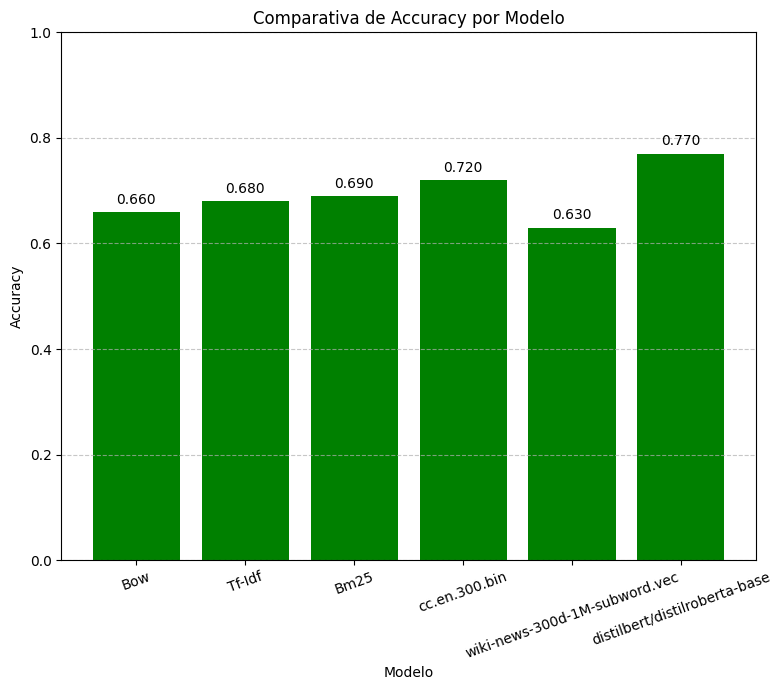

In [ ]:
import matplotlib.pyplot as plt

models = list(classification_models_results.keys())
accuracies = list(classification_models_results.values())

# Create bar plot
plt.figure(figsize=(8, 7))
bars = plt.bar(models, accuracies, color='green')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Modelo')
plt.title('Comparativa de Accuracy por Modelo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10, rotation=20)


for bar in bars:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, height + 0.01,        # colocarlo ligeramente por encima
             f'{height:.3f}',         # formato con 3 decimales
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

En la anterior gráfica podemos ver como destacan tanto el modelo transformers por ser el más preciso clasificando, como el de fasttext de extensión .vec entrenado con wikipedia por ser el que peor clasifica.

# EJERCICIO 3: Búsqueda de hilos similares

Cargamos el dataframe si hiciera falta

In [ ]:
# import pandas as pd
# import json
# output_folder = "subreddit_data"
# dataset = []
# for file in os.listdir(output_folder):
#     if file.endswith('.json'):
#         with open(os.path.join(output_folder, file), 'r', encoding='utf-8') as f:
#             subreddit_data = json.load(f)
#             thread_comments = [ {'thread_id':thread['thread_id'],'user': comment['user'], 'comment': comment['comment'], 'score': comment['score'], 'date': comment['date'], 'label':subreddit_data['label']}
#                                 for thread in subreddit_data['data']
#                                   for comment in thread['comments'] ]
#             dataset.extend(thread_comments)


# df = pd.DataFrame(dataset)

Para llevar a cabo esta búsqueda de hilos similares debemos obtener previamente una condificación numérica de estos, es decir un sentence embeddings que recoja sus características.

Para ello, el enfoque que parece más prometedor para obtener buenas representaciones es concatenar todos los textos de los comentarios en un mismo documento, separándolos por espacios en blanco, y obtener un sentence embedding directamente de todos los comentarios contatenados de un mismo hilo.
De esta forma al concatenar y luego obtener el embedding, propiciamos que FastText interprete el conjunto como una unidad coherente y más rica en contenido, lo que puede favorecer a una representación más informativa.




In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Cargamos el modelo
"""Modelo cc.en.bin muy completo pero demasiado pesado"""
model = "cc.en.300.bin"
ft_model = load_fasttext_model(model)

In [ ]:
import gc
"""Concatenamos los dataframes de train y test para así poder obtener un nuevo dataframe que contenga todos los campos que se les han ido añadiendo a
dichos dataframes pero con todas las entradas """

threads_embs = {}
for idx, thread in enumerate(df.thread_id.unique(), start = 1):
  concated_comments = df[df['thread_id'] == thread].sort_values('date') #Ordenamos cronológicamente
  subreddit_label = concated_comments.label.unique()[0] #Obtenemos la etiqueta del hilo
  concated_comments = ' '.join(concated_comments.comment.to_list())

  if model.endswith(".bin"):
    threads_embs[idx] = {'thread_id':thread, 'embedding' : ft_model.get_sentence_vector(concated_comments), 'subreddit_label':subreddit_label}
  else:
    threads_embs[idx] = {'thread_id':thread, 'embedding' : manual_sentence_embedding(concated_comments, ft_model), 'subreddit_label':subreddit_label}


#Borro de memoria el modelo dado que después no nos sirve para nada y ocupa un valioso espacio en la memoria RAM
del ft_model
gc.collect()

threads_dataframe = pd.DataFrame(threads_embs).T

results = cosine_similarity(threads_dataframe.embedding.to_list(), threads_dataframe.embedding.to_list())

In [ ]:
threads_dataframe.head(5)

,thread_id,embedding,subreddit_label
1,7etmk7,"[-0.01670196, 0.006173569, 0.011106882, 0.0453...",askscience
2,84auzr,"[-0.009533721, 0.0050444575, 0.005314455, 0.04...",askscience
3,gvc7k9,"[-0.012220411, 0.00073489, 0.008668047, 0.0380...",askscience
4,3by2nk,"[-0.009508879, 0.0011020035, 0.013603959, 0.05...",askscience
5,ewwmem,"[-0.009221326, 0.0017466136, 0.0065987045, 0.0...",askscience


In [ ]:
results.shape

(120, 120)

Results es una matriz en la que cada una de las 120 filas corresponde a una lista de valores de similitud de uno de los hilos con los 119 hilos restantes y con sí mismo, de ahí que haya valores exáctos de 1.

In [ ]:
results[8]

array([0.96504116, 0.96840596, 0.97124076, 0.968187  , 0.9715616 ,
       0.96715826, 0.9563159 , 0.9781949 , 0.9999997 , 0.96235704,
       0.9701801 , 0.9719768 , 0.9630857 , 0.9711585 , 0.9685181 ,
       0.97321415, 0.9742323 , 0.968629  , 0.9623905 , 0.9747324 ,
       0.9489819 , 0.9698913 , 0.954679  , 0.96069163, 0.95906425,
       0.94206625, 0.95772964, 0.9564743 , 0.9613551 , 0.9464467 ,
       0.9632106 , 0.9560868 , 0.9582562 , 0.951448  , 0.96887743,
       0.9685176 , 0.9660049 , 0.9333122 , 0.9528861 , 0.953338  ,
       0.953999  , 0.9652471 , 0.97350645, 0.96415955, 0.96175706,
       0.96004003, 0.95639104, 0.9744983 , 0.96757776, 0.963292  ,
       0.9598556 , 0.9586113 , 0.9659751 , 0.9682288 , 0.9602726 ,
       0.96031755, 0.9492473 , 0.9569717 , 0.96577674, 0.9622394 ,
       0.9637717 , 0.9637431 , 0.9596915 , 0.9667053 , 0.9638575 ,
       0.96685654, 0.96605206, 0.95733654, 0.96414423, 0.96468633,
       0.95874137, 0.9586901 , 0.9660329 , 0.9555507 , 0.96940


Con este enfoque de concatenar todos los comentarios de un hilo en un mismo texto, se producen resultados de similitud muy cercanos a 1 en prácticamente todos los casos, incluso entre hilos de distintos subreddits.

Muy probablemente esto se deba a la forma de obtenerse los sentence embeddings del hilo completo. Para obtener el embedding del hilo completo se saca la media de todos los word embeddings que componen el texto, por lo que al ser un texto bastante largo se acaban homogeneizando demasiado los embeddings dando lugar a pérdidas significativas de información, lo que se traduce en similitudes muy altas entre todos los hilos independientemente de que pertenezcan a subreddits muy distintos.

También podría ser que los sentence embeddings generados por el modelo son bastante similares entre sí. Una posible causa es, que los comentarios comparten un estilo de escritura parecido y utilizan un vocabulario común a muchos de ellos, lo que provoca que el modelo, al no ser contextual, no pueda distinguir adecuadamente el significado de palabras en función del contexto. Esto limita su capacidad para capturar diferencias semánticas sutiles entre hilos. Por ello, en la siguiente etapa, probaremos con modelos contextuales como los de Sentence Transformers, que están específicamente diseñados para generar representaciones más discriminativas del contenido textual.

DEFINICIÓN DE FUNCIONES QUE NOS SERÁN DE UTILIDAD PARA LA COMPARACIÓN DE LA SIMILITUD ENTRE HILOS.

Con la función `display_wordlist` pasamos los embeddings de los hilos a una representación en dos dimensiones, con tal de poder visualizarlos. Para ello primero aplicamos un PCA a los embeddings para hacer una primera reducción aproximativa quedándonos con las componentes más importantes lo que a su vez permite prescindir de cirto ruido o información poco relevante. Y tras el PCA se aplica t-SNE para terminar de llevarlos a dos dimensiones.

La función `find_similar_threads` la hemos diseñado para que nos devuelva un ranking en formato dataframe de las k parejas de hilos de distinto subreddit que más se parezcan entre sí.

Por último al función `cluster_analysis` nos devuelve las similitudes intercluster e intracluster así como el índice silueta. Con la similitud intercluster podemos ver como se similares son los subreddits entre sí según el modelo de representación usado, mientras que la similitud intracluster nos mide como de similares son entre sí los distintos hilos de un mismo subreddits. Y el índice silueta mide qué tan bien agrupados están los elementos dentro de sus propios grupos, comparado con otros grupos. Es una métrica de calidad del clustering, sin usar etiquetas verdaderas.

Todo ello atendiendo por supuesto a la representación vectorial que esté asignando el modelo en concreto con el que trabajamos, por lo que nos va a permitir comparar que tan bien representan los textos y además de forma indirecta como de bien discriminan entre clases.

In [ ]:
# Función para pintar las palabras en una gráfica
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns

def display_wordlist(emb_dataframe, model_name = None):

  # Antes de reducir a 2 dimensiones, vamos a reducir la dimensionalidad al
  # número de hilos distintos que tenemos usando una técnica llamada PCA
  reduc = PCA (
      n_components = len(emb_dataframe.thread_id)
  ).fit_transform (emb_dataframe.embedding.to_list ())


  # Ahora usamos otra técnica llamada TSNE para reducir la dimensionalidad a
  # 2 dimensiones, y poder mostrarlo en una gráfica.
  tsne = TSNE (perplexity = 5, n_components = 2, random_state = 0)
  np.set_printoptions (suppress = True)
  coords = tsne.fit_transform (reduc)


  # Obtenemos las coordenadas de la cada eje de manera individual
  x_coords = coords[:, 0]
  y_coords = coords[:, 1]


  # Asignamos un color a cada label
  unique_labels = emb_dataframe["subreddit_label"].unique()
  palette = sns.color_palette("hsv", len(unique_labels))
  label_color_dict = dict(zip(unique_labels, palette))


    # Pintamos
  plt.figure(figsize=(16, 10))
  for label in unique_labels:
    mask = emb_dataframe["subreddit_label"] == label
    plt.scatter(x_coords[mask], y_coords[mask], c=[label_color_dict[label]], label=label, s=50)

  for label, x, y in zip (emb_dataframe.thread_id, x_coords, y_coords):
    plt.annotate (
      label,
      xy = (x, y),
      xytext = (5, 2),
      textcoords = 'offset points'
    )

  plt.legend(title="Subreddit")
  plt.title(f"Visualización de {model_name}")
  plt.xlim (x_coords.min () - 10, x_coords.max () + 10)
  plt.ylim (y_coords.min () - 10, y_coords.max () + 10)
  plt.show()

In [ ]:
def find_similar_threads(similarity_matrix, labels, thread_ids, top_k, sort = 'descending'):
  if sort == 'descending':
    reverse = True
  else:
    reverse = False

  n = len(labels)
  pairs = []
  for i in range(n):
    for j in range(i+1, n):
      if labels[i] != labels[j]:
        pairs.append((thread_ids[i], labels[i], thread_ids[j], labels[j], similarity_matrix[i, j]))


  top_pairs = sorted(pairs, key=lambda x: x[4], reverse=reverse)[:top_k]
  df_top_pairs = pd.DataFrame(top_pairs, columns=[
      'Thread 1', 'Subreddit 1', 'Thread 2', 'Subreddit 2', 'Similarity'
  ])
  return df_top_pairs


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

def cluster_analysis(embeddings, labels, similarity_matrix, thread_ids):
    # 1. Calculamos el índice silueta
    sil_score = silhouette_score(embeddings, labels, metric='cosine')

    # 2.Sacamos el promedio de la similaridad intracluster e intecluster
    n = len(labels)
    intra_sims = []
    inter_sims = []
    for i in range(n):
        for j in range(i+1, n):
            if labels[i] == labels[j]:
                intra_sims.append(similarity_matrix[i, j])
            else:
                inter_sims.append(similarity_matrix[i, j])
    avg_intra = np.mean(intra_sims)
    avg_inter = np.mean(inter_sims)

    summary = pd.DataFrame({
        'Metric': ['Silhouette Score', 'Avg Intra-cluster Sim', 'Avg Inter-cluster Sim'],
        'Value': [sil_score, avg_intra, avg_inter]
    })

    return summary



En el enunciado se nos dice que 'La idea aquí es poder encontrar los hilos
más parecidos entre sí', para poder afrontar esta petición vamos a encontrar los 10 comentarios más parecidos entre sí de entre los subreddits, es decir a tomar a aquellas parejas de hilos de distintos subreddits que sean muy parecidos entre sí.

In [ ]:
top_similar = find_similar_threads(similarity_matrix = results, labels = threads_dataframe.subreddit_label.to_list(), thread_ids = threads_dataframe.thread_id.to_list(), top_k = 10)
tail_similar = find_similar_threads(similarity_matrix = results, labels = threads_dataframe.subreddit_label.to_list(), thread_ids = threads_dataframe.thread_id.to_list(), top_k = 10, sort = 'ascending')

In [ ]:
top_similar

,Thread 1,Subreddit 1,Thread 2,Subreddit 2,Similarity
0,7etmk7,askscience,6bytpx,technology,0.997390
1,7etmk7,askscience,7dwqv6,technology,0.996784
2,1i7kyff,nba,1i7gufa,technology,0.996766
3,dic2ak,nba,erd274,technology,0.995597
4,3by2nk,askscience,1i7kyff,nba,0.995297
5,1i7kyff,nba,1hxv241,technology,0.995051
6,3by2nk,askscience,144g35v,technology,0.995034
7,diagb7,nba,erd274,technology,0.994817
8,3by2nk,askscience,1i7gufa,technology,0.994639
9,3by2nk,askscience,u178zp,technology,0.994616


In [ ]:
tail_similar

,Thread 1,Subreddit 1,Thread 2,Subreddit 2,Similarity
0,7k296s,askscience,iya91a,Cooking,0.916246
1,7k296s,askscience,cgbc7u,Cooking,0.916447
2,gzb3gy,askscience,iya91a,Cooking,0.917653
3,iya91a,Cooking,eubekc,nba,0.918373
4,iya91a,Cooking,6cvg82,technology,0.918417
5,nzh4j0,askscience,iya91a,Cooking,0.918450
6,iya91a,Cooking,rqts9j,nfl,0.918797
7,iya91a,Cooking,kt785i,technology,0.919160
8,iya91a,Cooking,7qg5lv,nfl,0.919356
9,dlh4kv,askscience,iya91a,Cooking,0.919774


Obviando el hecho de que con la representación vectorial que ofrece fasttext todos los hilos son considerados muy similares entre sí, parece que los hilos que más tienden a parecerse con esta representación son los de los subreddits de askscience y technology, junto con alguno de la nba.


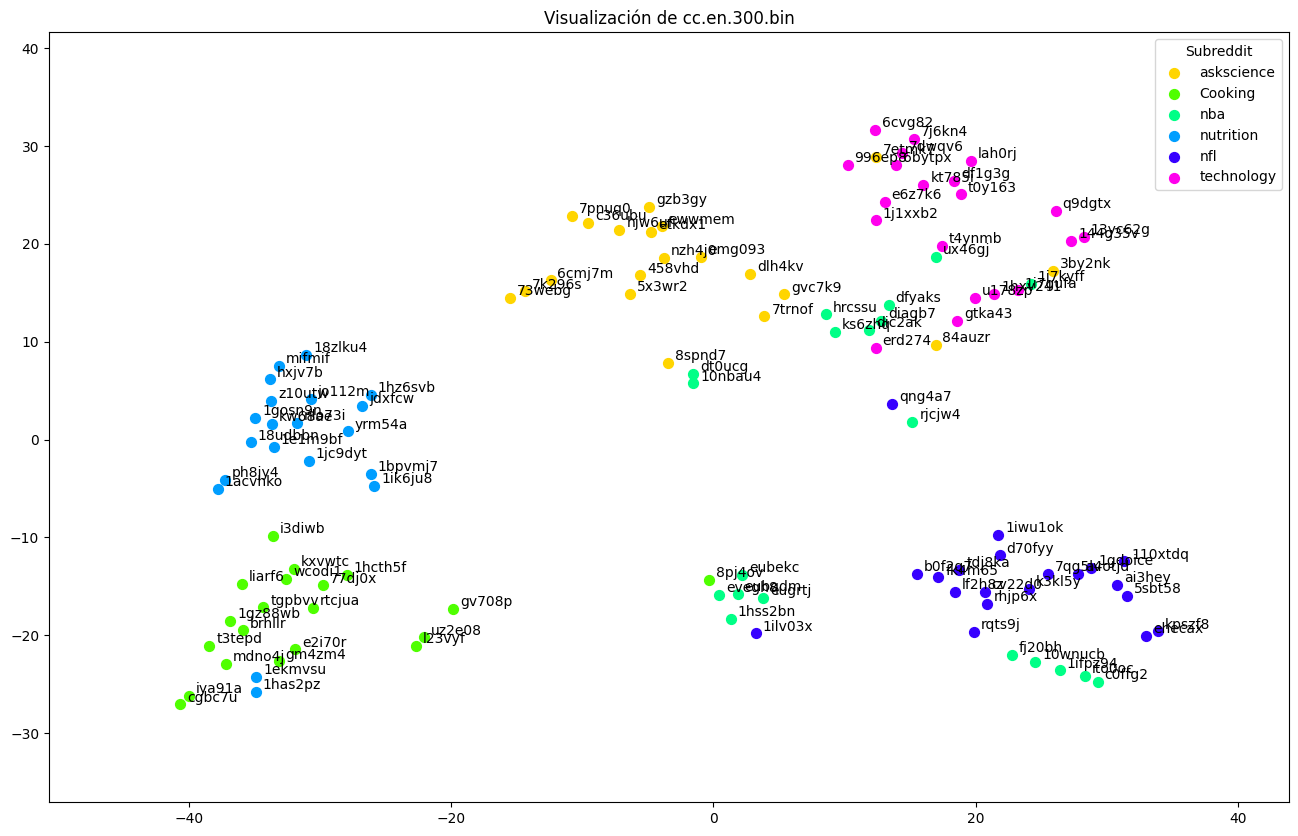

In [ ]:
display_wordlist(threads_dataframe, model)

Podemos ver en la gráfica como hay algunos hilos de nutrition que se confunden con cooking (verde y azul claros). Resulta curioso como los hilos de la nba no solo se solapan con los de la nfl sino que también con los de tecnology y askscience. Llama la atención que para este subreddit de nba hay 3 grupos de hilos, bien diferenciados, los que se parecen más a la nfl, los que se solapan con tecnology y/o askscience los cuales está muy cercanos entre sí, y otro grupo algo más aislado. Quitando esta peculiaridad de los hilos del subreddit de la nba, vemos claramente que donde hay mayor similitud o parecido entre hilos es en los subreddits de un mismo ámbito.

Sería también de utilidad poder ver la similitud interclúster que tiene el modelo, dado que cuanta menor sea esta métrica, mejor asigna una representación más distintiva a los hilos.

In [ ]:
cluster_analysis(embeddings = threads_dataframe.embedding.to_list(), labels = threads_dataframe.subreddit_label.to_list(), similarity_matrix = results, thread_ids = threads_dataframe.thread_id.to_list())


,Metric,Value
0,Silhouette Score,0.165764
1,Avg Intra-cluster Sim,0.983677
2,Avg Inter-cluster Sim,0.969364


Las métricas confirman que los embeddings están demasiado homogeneizados, por lo que apenas distinguen entre hilos de distintos subreddits.

El índice silueta es muy bajo lo que nos indica que los subreddits están poco separados.
Luego la similitud intracluster es muy alta, lo que es síntoma de que hilos dentro del mismo cluster son casi idénticos, o mejor dicho se están representando prácticamente de la misma forma. Ocurre los mismo con la similitud intercluster, es muy alta lo que indica que los hilos de diferentes clusters también se representan de forma casi igual.

APLICANDO SENTENCE-TRANSFORMERS

Con el uso de Sentence Transformers para representar los hilos, las representaciones mejorarán notablemente porque, estos generan embeddings contextuales que capturan el significado completo del texto, considerando las relaciones entre palabras. A diferencia de FastText, que suma vectores de palabras sin contexto, los embeddings de Sentence Transformers distinguen sentidos y matices, por lo que tienden a ser más precisos y discriminativos.
Al usar modelos preentrenados y específicamente ajustados para esta tarea de similitud semántica, evitamos que los embeddings de textos largos se "promedien" y se vuelvan demasiado parecidos, que es el problema que surge con FastText.

In [ ]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

Tras buscar entre varios modelos que parecían interesantes y prometían ser bastante buenos, decidimos quedarnos con sentence-transformers/all-MiniLM-L6-v2, Alibaba-NLP/gte-large-en-v1.5 y sentence-transformers/all-mpnet-base-v2

`sentence-transformers/all-MiniLM-L6-v2`: tiene un tamaño pequeño, se trata de un modelo compacto (6 capas, versión mini de BERT) muy ligero y rápido para generar embeddings. Está entrenado principalmente en inglés, pero funciona razonablemente bien en otros idiomas, aunque no es multilingüe nativo.

`Alibaba-NLP/gte-large-en-v1.5`: Es un modelo grande y profundo por lo que produce embeddings con representaciones semánticas más ricas y detalladas.
Está especializado en inglés y enfocado en tareas de comprensión semántica avanzada.

`sentence-transformers/all-mpnet-base-v2`: Es un modelo basado en MPNet, un Transformer más avanzado que BERT y RoBERTa que combina lo mejor de dos enfoques de preentrenamiento, la predicción de tokens permutados y el enmascaramiento de tokens. Esta combinación puede mejora la captura de dependencias a largo plazo y el entendimiento del contexto.

In [ ]:
# 'sentence-transformers/all-MiniLM-L6-v2' #solo inglés 22.7M params
# 'Alibaba-NLP/gte-Qwen2-7B-instruct' 7B params inglés y chino  #Demasiado pesado para la gpu
# 'Snowflake/snowflake-arctic-embed-m-v2.0' #Multilingüe y 205 M
# 'thenlper/gte-large' #inglés solo y 335 M params
# 'Alibaba-NLP/gte-large-en-v1.5' #inglés solo y 434 M params
# 'Alibaba-NLP/gte-base-en-v1.5' inglés solo y 137 M params

sentence_transformers_names = ['sentence-transformers/all-MiniLM-L6-v2', 'Alibaba-NLP/gte-large-en-v1.5', 'sentence-transformers/all-mpnet-base-v2']

In [ ]:
from sentence_transformers import SentenceTransformer
import torch
results_dict = {}
for sentence_transformer_name in sentence_transformers_names:
  model = SentenceTransformer(sentence_transformer_name, trust_remote_code=True, device = 'cuda')

  threads_list = []
  for thread in df.thread_id.unique():
    concated_comments = df[df['thread_id'] == thread].sort_values('date') #Ordenamos cronológicamente
    subreddit_label = concated_comments.label.unique()[0] #Obtenemos la etiqueta del hilo
    concated_comments = ' '.join(concated_comments.comment.to_list())


    embeddings = model.encode(concated_comments)
    threads_list.append({'thread_id':thread, 'embedding' : embeddings, 'subreddit_label':subreddit_label})

  results_dict[sentence_transformer_name] = pd.DataFrame(threads_list)

  #Para borrar la memoria VRAM (GPU) ocuapra en la iteración anterior, una ve
  torch.cuda.empty_cache()
  torch.cuda.ipc_collect()


    #La idea es construir un diccionario como el siguiente, para manipularlo después:
    # { 'sentence-transformers/all-MiniLM-L6-v2':[{'thread_id': HILO1, 'embedding' : [-0.000001e-2,....], 'subreddit_label': POLITICS},{'thread_id': HILO1, 'embedding' : [-0.000001e-2,....], 'subreddit_label': POLITICS}],
    #   'Alibaba-NLP/gte-Qwen2-7B-instruct':[{},{}],
    #   'sentence-transformers/all-mpnet-base-v2':[{},{}]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

configuration.py:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py:   0%|          | 0.00/59.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
!ls -lh /root/.cache/huggingface/hub/
import gc
del model
gc.collect()



total 16K
drwxr-xr-x 6 root root 4.0K May 18 09:03 models--Alibaba-NLP--gte-large-en-v1.5
drwxr-xr-x 5 root root 4.0K May 18 09:03 models--Alibaba-NLP--new-impl
drwxr-xr-x 6 root root 4.0K May 18 09:03 models--sentence-transformers--all-MiniLM-L6-v2
drwxr-xr-x 6 root root 4.0K May 18 09:05 models--sentence-transformers--all-mpnet-base-v2


9717

In [ ]:
results_dict['sentence-transformers/all-MiniLM-L6-v2'].head(5)

,thread_id,embedding,subreddit_label
0,7etmk7,"[0.019677218, -0.008768922, 0.034518216, 4.226...",askscience
1,84auzr,"[-0.021474198, -0.027089037, -0.004563682, 0.0...",askscience
2,gvc7k9,"[-0.004410323, 0.034714904, 0.0027355577, 0.03...",askscience
3,3by2nk,"[-0.0315924, -0.06775922, 0.056068067, 0.01945...",askscience
4,ewwmem,"[-0.05094804, 0.04593818, -0.0002833465, 0.061...",askscience


In [ ]:
results1 = cosine_similarity(results_dict['sentence-transformers/all-MiniLM-L6-v2'].embedding.to_list(), results_dict['sentence-transformers/all-MiniLM-L6-v2'].embedding.to_list())
results2 = cosine_similarity(results_dict['Alibaba-NLP/gte-large-en-v1.5'].embedding.to_list(), results_dict['Alibaba-NLP/gte-large-en-v1.5'].embedding.to_list())
results3 = cosine_similarity(results_dict['sentence-transformers/all-mpnet-base-v2'].embedding.to_list(), results_dict['sentence-transformers/all-mpnet-base-v2'].embedding.to_list())

## Primer modelo Transformers: 'sentence-transformers/all-MiniLM-L6-v2'

  Thread 1 Subreddit 1 Thread 2 Subreddit 2  Similarity
0   ito0oc         nba   k3kl5y         nfl    0.593974
1   7etmk7  askscience   7j6kn4  technology    0.573321
2  10wnucb         nba   k3kl5y         nfl    0.558516
3   7etmk7  askscience   6cvg82  technology    0.547641
4   7etmk7  askscience   7dwqv6  technology    0.541421
5   qng4a7         nfl  1hxv241  technology    0.537147
6   eugrtj         nba   k3kl5y         nfl    0.536812
7   77dj0x     Cooking   ph8jy4   nutrition    0.526210
8   fj20bh         nba   k3kl5y         nfl    0.518035
9   diagb7         nba   df1g3g  technology    0.513632 



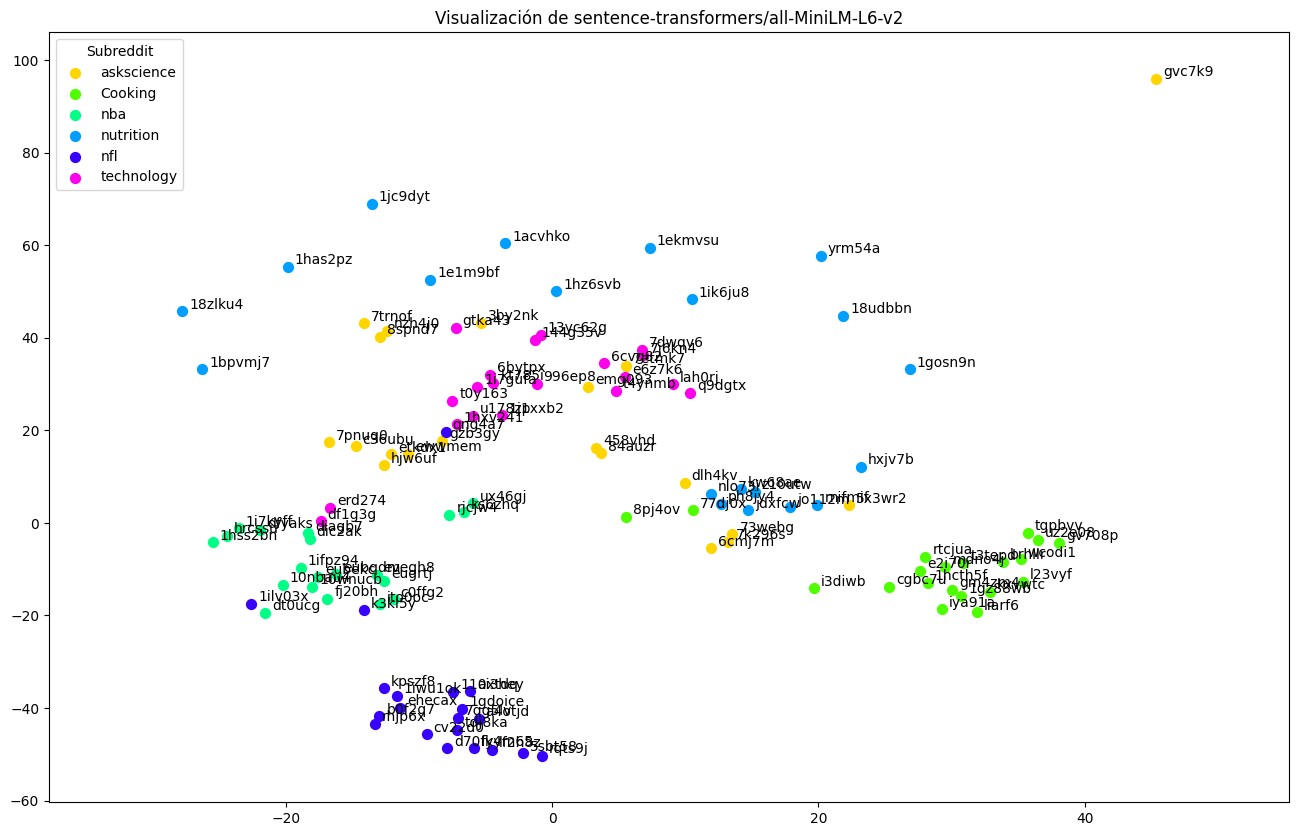

,Metric,Value
0,Silhouette Score,0.166328
1,Avg Intra-cluster Sim,0.339867
2,Avg Inter-cluster Sim,0.108447


In [ ]:
top_similar = find_similar_threads(similarity_matrix = results1, labels = results_dict[ 'sentence-transformers/all-MiniLM-L6-v2'].subreddit_label.to_list(), thread_ids = results_dict[ 'sentence-transformers/all-MiniLM-L6-v2'].thread_id.to_list(), top_k = 10)
print(top_similar, "\n")
display_wordlist(results_dict[ 'sentence-transformers/all-MiniLM-L6-v2'], 'sentence-transformers/all-MiniLM-L6-v2')
cluster_analysis(embeddings = results_dict[ 'sentence-transformers/all-MiniLM-L6-v2'].embedding.to_list(), labels = results_dict[ 'sentence-transformers/all-MiniLM-L6-v2'].subreddit_label.to_list(), similarity_matrix = results1, thread_ids = results_dict[ 'sentence-transformers/all-MiniLM-L6-v2'].thread_id.to_list())


Con este primer modelo transformer ya vemos como la similitud entre pares de hilos procedentes de distintos subreddits cae bastante por debajo de los valores que se conseguían con el modelo de fasttext, lo que nos está indicando que las representaciones obtenidas ya no son tan parecidas entre sí.
Vemos como los hilos de distintos subreddits más parecidos entre sí pertenecen a nba y nfl y askscience y technology.

En el gráfico se aprecia bastante solapamiento entre la mayoria de los subredits, a excepción de nfl y cooking. Esto nos lo corrobora además el bajo valor del índice silueta (0.166). Los grupos no están bien separados, aunque hay cierta tendencia a formar agrupaciones, pero con poca claridad.

La medida intracluster e intercluster tampoco son muy altas lo que nos indica que por un lado los hilos de un mismo grupo no son excesivamente similares entre sí, y por otro lado que las agrupaciones quedan relativamente bien diferenciadas entre sí.

Segundo moselo transformers: `'Alibaba-NLP/gte-large-en-v1.5'`

  Thread 1 Subreddit 1 Thread 2 Subreddit 2  Similarity
0   7etmk7  askscience   7j6kn4  technology    0.923581
1   7etmk7  askscience   6bytpx  technology    0.907973
2   7etmk7  askscience   7dwqv6  technology    0.885733
3   7etmk7  askscience   6cvg82  technology    0.882411
4  1i7kyff         nba  1i7gufa  technology    0.849613
5   wcodi1     Cooking   ph8jy4   nutrition    0.838424
6   kxvwtc     Cooking  1gosn9n   nutrition    0.834421
7   kxvwtc     Cooking  1acvhko   nutrition    0.823577
8   kxvwtc     Cooking   ph8jy4   nutrition    0.822089
9   kxvwtc     Cooking  18udbbn   nutrition    0.817030 



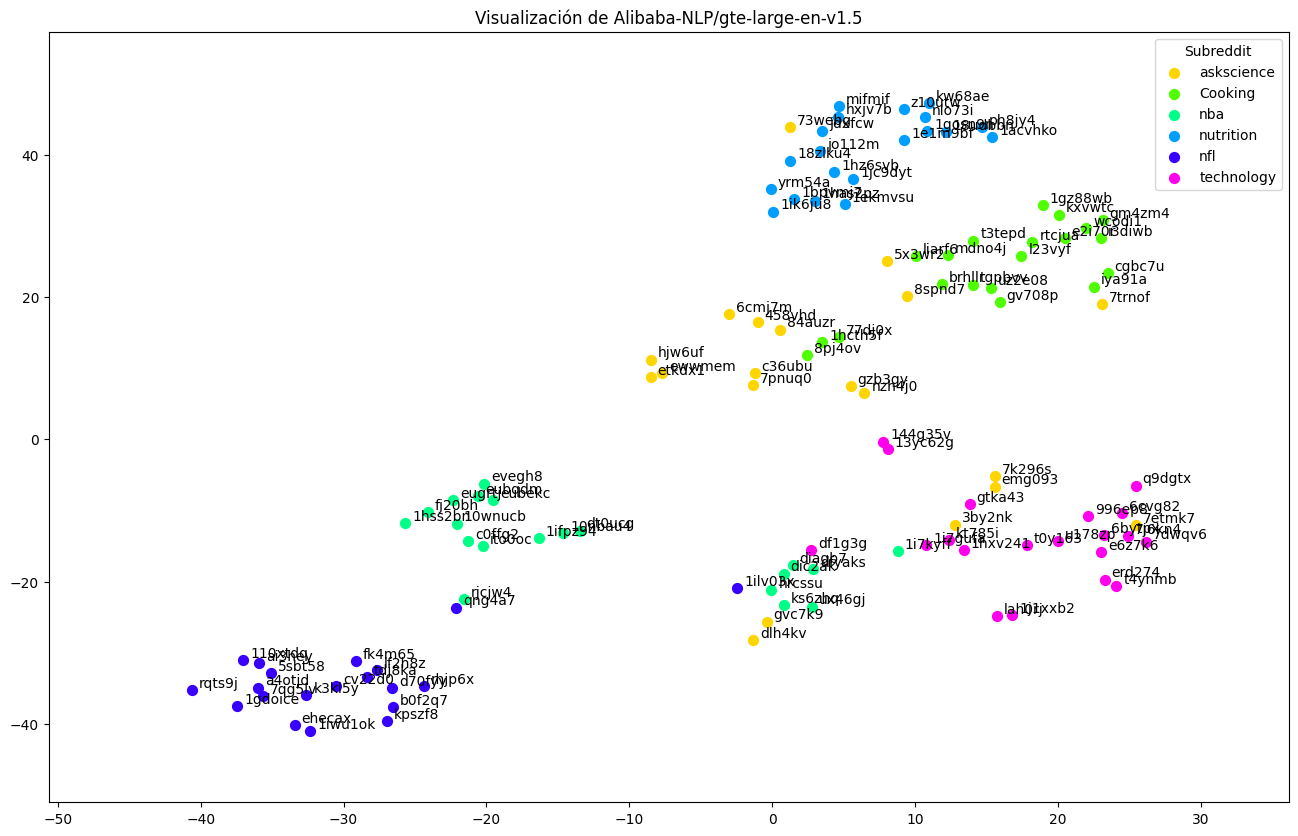

,Metric,Value
0,Silhouette Score,0.220906
1,Avg Intra-cluster Sim,0.339867
2,Avg Inter-cluster Sim,0.108447


In [ ]:
top_similar = find_similar_threads(similarity_matrix = results2, labels = results_dict['Alibaba-NLP/gte-large-en-v1.5'].subreddit_label.to_list(), thread_ids = results_dict['Alibaba-NLP/gte-large-en-v1.5'].thread_id.to_list(), top_k = 10)
print(top_similar, "\n")
display_wordlist(results_dict['Alibaba-NLP/gte-large-en-v1.5'], 'Alibaba-NLP/gte-large-en-v1.5')
cluster_analysis(embeddings = results_dict['Alibaba-NLP/gte-large-en-v1.5'].embedding.to_list(), labels = results_dict['Alibaba-NLP/gte-large-en-v1.5'].subreddit_label.to_list(), similarity_matrix = results1, thread_ids = results_dict['Alibaba-NLP/gte-large-en-v1.5'].thread_id.to_list())

En el modelo de Alibaba percibimos una mejor separabilidad entre las distintas clases con algo de solapamiento principalmente entre askscience y tecnology, pero con agrupaciones diferenciadas.

Destaca también que entre las top 10 parejas de hilos de distinto subreddits mas distintos siguen figurando en primer lugar askscience y technology y además cooking y nutrition

El valor del índice silueta mejora, lo que nos indica que las agrupaciones son algo más coherentes, aunque aún hay solapamiento entre grupos.

La similitud intracluster es un valor moderado, lo que sugiere que los hilos dentro de un mismo subreddit no son excesivamente similares entre sí, aunque hay cierta relación o coherencia.

La baja métrica intercluster nos indica que los hilos de diferentes cluster se representan de forma distinta entre sí, lo que refuerza que hay una separación clara entre temas distintos.

Tercer modelo Transfomers: `'sentence-transformers/all-mpnet-base-v2'`





  Thread 1 Subreddit 1 Thread 2 Subreddit 2  Similarity
0   7etmk7  askscience   7j6kn4  technology    0.743046
1   7etmk7  askscience   7dwqv6  technology    0.708672
2   7etmk7  askscience   6bytpx  technology    0.670871
3   rjcjw4         nba   qng4a7         nfl    0.669550
4  1i7kyff         nba  1i7gufa  technology    0.612973
5   diagb7         nba   df1g3g  technology    0.609635
6   7etmk7  askscience   6cvg82  technology    0.595421
7   dic2ak         nba   df1g3g  technology    0.578259
8   kxvwtc     Cooking   ph8jy4   nutrition    0.558563
9   gm4zm4     Cooking   ph8jy4   nutrition    0.536228 



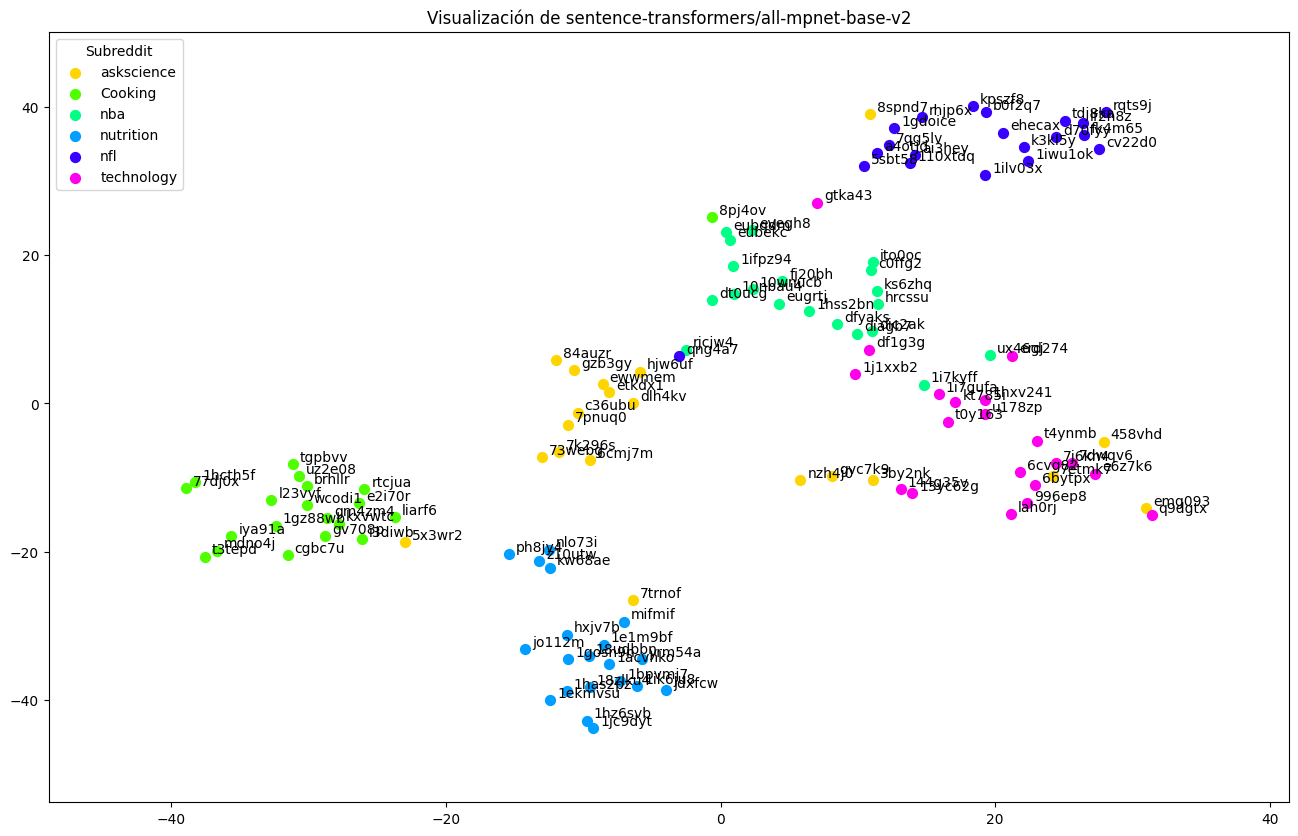

,Metric,Value
0,Silhouette Score,0.169336
1,Avg Intra-cluster Sim,0.339867
2,Avg Inter-cluster Sim,0.108447


In [ ]:
top_similar = find_similar_threads(similarity_matrix = results3, labels = results_dict['sentence-transformers/all-mpnet-base-v2'].subreddit_label.to_list(), thread_ids = results_dict['sentence-transformers/all-mpnet-base-v2'].thread_id.to_list(), top_k = 10)
print(top_similar, "\n")
display_wordlist(results_dict['sentence-transformers/all-mpnet-base-v2'], 'sentence-transformers/all-mpnet-base-v2')
cluster_analysis(embeddings = results_dict['sentence-transformers/all-mpnet-base-v2'].embedding.to_list(), labels = results_dict['sentence-transformers/all-mpnet-base-v2'].subreddit_label.to_list(), similarity_matrix = results1, thread_ids = results_dict['sentence-transformers/all-mpnet-base-v2'].thread_id.to_list())

En este tercer modelo, la representación gráfica muestra una estructura similar a la anterior, con grupos diferenciados aunque con una separación entre grupos ligeramente menor, lo que sugiere una distinción entre clases menos marcada.

Esto lo corroboramos con métricas similares a las del modelo anterior con una baja similitud intercluster, y moderada intracluster. Pero con un índice silueta más bajo, lo que nos indica una separación no muy alta entre los clusters.


Al utilizar modelos contextuales como los Sentence Transformers, se consigue una representación semántica más rica y precisa de los hilos. Estos modelos generan codificaciones que capturan mejor el significado del texto, lo que permite distinguir más fácilmente entre hilos distintos.

# EJERCICIO 4:Análisis de subjetividad de los comentarios



https://huggingface.co/models?other=sentiment-analysis

Por si tuviése que cargarse el dataframe de nuevo

In [ ]:
# import pandas as pd
# import json
# output_folder = "subreddit_data"
# dataset = []
# for file in os.listdir(output_folder):
#     if file.endswith('.json'):
#         with open(os.path.join(output_folder, file), 'r', encoding='utf-8') as f:
#             subreddit_data = json.load(f)
#             thread_comments = [ {'thread_id':thread['thread_id'],'user': comment['user'], 'comment': comment['comment'], 'score': comment['score'], 'date': comment['date'], 'label':subreddit_data['label']}
#                                 for thread in subreddit_data['data']
#                                   for comment in thread['comments'] ]
#             dataset.extend(thread_comments)


# df = pd.DataFrame(dataset)

Para el análisis de subjetividad, utilizaremos modelos preentrenados de análisis de sentimientos y emociones, que nos permitirán inferir la carga emocional o afectiva de un comentario, clasificándolo según su sentimiento predominante o la emoción que transmite.

Emplearemos los modelos 'finiteautomata/bertweet-base-sentiment-analysis', 'michellejieli/emotion_text_classifier'. El primero es un modelo basado en BERTweet, una versión de BERT adaptada a texto de Twitter, que está específicamente entrenado para clasificar sentimientos en publicaciones cortas como tweets o comentarios informales. Clasifica en 3 clases positive, neutral y negative. Mientras que el segundo está entrenado para clasificar emociones humanas expresadas en texto. Identificar distintas emociones como joy, anger, sadness, o fear. Es útil para entender con mayor precisión el estado emocional que transmite un comentario más allá de su polaridad/sentimiento.

Definimos la función sent_classifier que recibe como parámetros el texto a procesar, el modelo que se usará para inferir y el tokenizador para el procesamiento previo del texto. Dado que uno de los modelos es de Bert, le vamos a indicar que trunque los comentarios que pudieran haber con una longitud mayor a 512 tokens. La función retorna la predicción relaizada sobre el texto.

In [ ]:
import pandas as pd
import transformers
from transformers import AutoModelForSequenceClassification

def sent_classifier(text, model, tokenizer):
  inputs = tokenizer(text, return_tensors="pt", truncation=True)
  with torch.no_grad():
    logits = model(**inputs).logits
  predicted_class_id = logits.argmax().item()
  prediction = model.config.id2label[predicted_class_id]
  return prediction

# NUM_LABELS = 3

for path_sentiment_model in ['finiteautomata/bertweet-base-sentiment-analysis', 'michellejieli/emotion_text_classifier']:   #Podríamos añadir más sentimientos
  # Obtenemos el tokenizer
  tokenizer = transformers.AutoTokenizer.from_pretrained (path_sentiment_model)
  # Obtener el modelo correspondiente
  sentiment_model = AutoModelForSequenceClassification.from_pretrained(path_sentiment_model)

  if re.search(r'sentiment', path_sentiment_model, re.IGNORECASE):
    df['sentiment'] = df['comment'].apply(lambda text : sent_classifier(text, model = sentiment_model, tokenizer = tokenizer))
  else:
    df['emotion'] = df['comment'].apply(lambda text : sent_classifier(text, model = sentiment_model, tokenizer = tokenizer))

  torch.cuda.empty_cache()
  torch.cuda.ipc_collect()


tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/413 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

In [ ]:
import gc
del sentiment_model
gc.collect()

11536

In [ ]:
df

,thread_id,user,comment,score,date,label,sentiment,emotion
0,7etmk7,joelharris1980,How come in previous instances of this fight t...,1,2017-11-28 02:59:01,askscience,NEU,neutral
1,7etmk7,russiansduringpoopin,Net Neutrality is and why ISPs are wanting to ...,1,2017-11-25 22:50:32,askscience,NEG,neutral
2,7etmk7,jeffpcaron,"If you don’t like the terms of your ISP, switc...",0,2017-11-23 18:05:04,askscience,NEU,neutral
3,7etmk7,joeschmo945,I wrote my congressman this morning with this ...,1,2017-11-23 16:56:48,askscience,NEG,anger
4,7etmk7,GamerFan2012,These are the 3 people left deciding the fate ...,1,2017-11-23 16:52:46,askscience,NEU,anger
...,...,...,...,...,...,...,...,...
5995,996ep8,totallya_russianbot,"I mean, Net Neutrality asked that ISPs don't d...",1,2018-08-21 21:03:44,technology,NEU,neutral
5996,996ep8,magicfultonride,I like how they can't choose to not be complet...,-1,2018-08-21 22:36:05,technology,NEG,neutral
5997,996ep8,TypoChampion,"Oh Jesus, where to begin unraveling this bulls...",1,2018-08-21 22:41:45,technology,NEG,disgust
5998,996ep8,AvieeCorn,"Because as my libertarian friends say, “compan...",-1,2018-08-21 23:46:48,technology,POS,neutral


Vamos a visualizar aleatoriamente una pequeña muestra para hacernos una idea de que tan bien predicen los modelos.

In [ ]:
import pandas as pd

sample_df = df[['comment', 'sentiment', 'emotion']].sample(10, random_state=42)

for index, row in sample_df.iterrows():
    print(f"Comentario: {row['comment']}")
    print(f"Sentimiento: {row['sentiment']}")
    print(f"Emoción: {row['emotion']}")
    print("\n")



Comentario: If you wish to wield that wheel as to tool for gaining sexual favor, then learn to make Cacio Pepe and Pasta Carbonara. No shortcuts like using ham or cream for the Carbonara. Learn to do it the real Italian way. Then serve it up to the lust of your life. Oh! Wait a sec… Carbonara uses Pecorino Romano. But learning how to emulsify the parmeggiano to make sauce is the key technique. If you do it perfectly, you might end up getting married. Be forewarned.
Sentimiento: NEU
Emoción: neutral


Comentario: The basic answer: people often have misconceptions about weight loss and fitness, this comes from speculation amongst people who just haven't been properly educated, and people who try to make money off this by selling products and programs. The more broad answer: Nutrition being a science itself, our knowledge of it is bound to change and develop over time. If you want an unbiased account of what we know so far, it may be beneficial to read textbooks or other academic works yo

A priori las predicciones parecen bastante razonables, auqnue tienen algunos errores claros.
Por ejemplo en la frase `My uncle: I don’t like onions or garlic. This is the best soup I’ve ever had. What’s the secret? Me: lots of onions and garlic…` el sentimiento podemos entender que es claramente positivo e incluso cómico, pero la emoción la clasifica como 'disgust' cuando lo más acertado a mi parecer sería 'joy'. Muy probablemente prediga 'disgust' dado que comienza mencionando a ingredientes que a la persona dice no gustarle.


También podemos ver como en el comentario `This...Posts like his is literally the only reason I'm still subbed on this dumb subreddit. Nice job, mate, keep it up.` a pesar de ser aparentemente positivo ("Nice job"), el modelo captura la carga sarcástica negativa del contexto general del subreddit y su frustración. Por lo que clasificarlo como anger podría ser entendible.


Por último debemos mencionar también cuando comete errores, como en  
`Since i saw many people claiming that the corona virus was developed by a chinese biological weapons facility, is there any further evidence?..."`
donde el sentimiento negativo está bien por el tipo de contenido preocupante, pero no debería clasificar la emoción como  "neutral"  sino más bien "fear".





<ipython-input-41-e7104f46bbdd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='pastel')
<ipython-input-41-e7104f46bbdd>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index, palette='pastel')


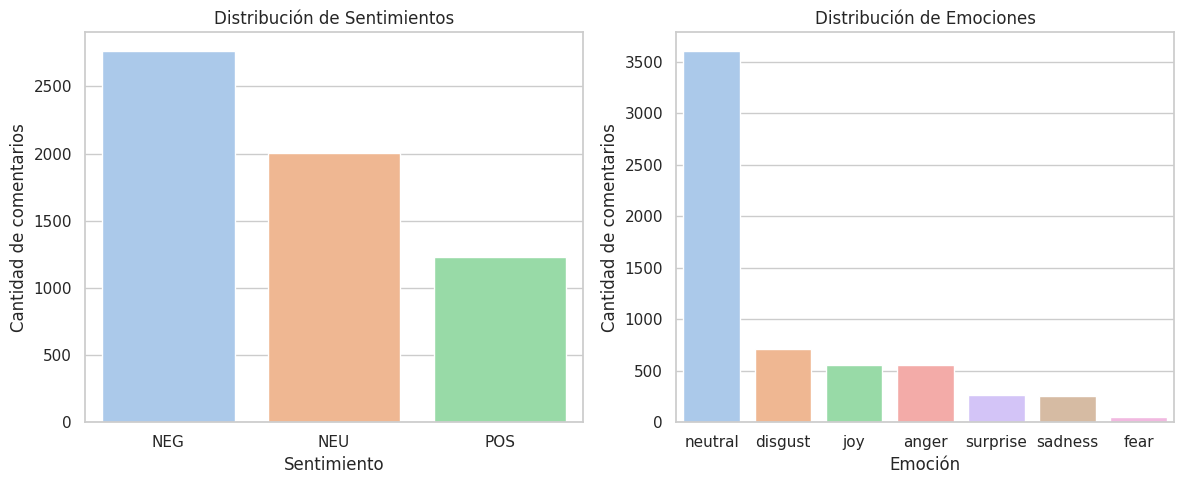

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='pastel')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de comentarios')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='emotion', order=df['emotion'].value_counts().index, palette='pastel')
plt.title('Distribución de Emociones')
plt.xlabel('Emoción')
plt.ylabel('Cantidad de comentarios')

plt.tight_layout()
plt.show()


En las gráficas vemos como predomina la neutralidad. Tanto en sentimientos como emociones, lo que nos estaría indicando que la mayoría de los usuarios escribe de manera informativa o desapasionada.

Además hay en torno al doble de comentarios negativos que positivos. Esto sugiere que, aunque muchos comentarios sean neutros, cuando opinan tienden a criticar o matizar problemas (por ejemplo, debatir fallos, contradecir ideas, o señalar carencias) antes que alabar o felicitar.
Esto a su vez concuerda con que después de la amplia mayoría de emociones neutras, las emociones con más peso son disgust y anger, aunque también joy.


In [ ]:
import os
import json
import pandas as pd

input_folder  = "subreddit_data"
output_folder = "subreddit_data_sents"
os.makedirs(output_folder, exist_ok=True)

df_indexed = df.set_index(['thread_id', 'comment'])

for fname in os.listdir(input_folder):

    in_path  = os.path.join(input_folder, fname)
    out_path = os.path.join(output_folder, fname)

    with open(in_path, "r", encoding="utf-8") as f:
        payload = json.load(f)

    label = payload.get("label")
    threads = payload.get("data", [])

    # Para cada hilo y cada comentario, añadimos sentiment y emotion
    for thread in threads:          #Itero por cada hilo
        tid = thread["thread_id"]
        for comment in thread["comments"]:      #Y por cada comentario del hilo para así tomar el thread id y el comentario en sí como índices a buscar en el dataframe que hemos reindexado.
            text = comment["comment"]

            row = df_indexed.loc[(tid, text)]   #Saco la fila correspondiente del dataframe al comentario actual

            if isinstance(row, pd.DataFrame):
                row = row.iloc[0]
            comment["sentiment"] = row["sentiment"]   #al comentario actual que estoy recogiendo que se trata de un diccionario de json, le añado el par clave valor correspondiente a los sentimientos y a las emociones resultantes de la clasificación
            comment["emotion"]   = row["emotion"]


    with open(out_path, "w", encoding="utf-8") as f:                #Finalemente guardo la modificación del json en un directorio a parte.
        json.dump({"label": label, "data": threads}, f, indent=2, ensure_ascii=False)



<ipython-input-42-a0236faa1829>:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  row = df_indexed.loc[(tid, text)]   #Saco la fila correspondiente del dataframe al comentario actual
